# Credit EDA Assignment

## Business Objective
This Assignment basically aims as identifying the various factors in BFSI that lead to default paymnets in loans, so that at the time of lending money to a customers the bank or the financial institution does not face any money loss. The company can utilise this knowledge for its portfolio and risk assessment.

This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

In [1]:
# import libraries

import numpy as np,pandas as pd,matplotlib.pyplot as plt,seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the application_data.csv file

appdata=pd.read_csv('/Users/avinseth/Desktop/Data Toolkit/Mod 7 Credit EDA Assignment/Credit EDA Case Study/application_data.csv',header=0)

In [3]:
#reading the dataset
appdata.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# make all the columns and rows visible and find the size of the dataset

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
appdata.shape

(307511, 122)

In [5]:
appdata.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

# Checking the data set info

In [6]:
appdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


# Checking the Mathematical parameters of the dataset

In [7]:
appdata.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

# Checking the datatypes of the dataset

In [8]:
appdata.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


## STEP 1: Identify the Missing Values and Rectify them

In [9]:
# calculate the percentage of missing values in the entire dataset
# find columns with missing values that are greater than 45%

napercent=appdata.isna().mean()   #variable napercent has shows the percentage of missing values in entire dataset
napercent

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.000039
AMT_GOODS_PRICE                 0.000904
NAME_TYPE_SUITE                 0.004201
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OWN_CAR_AGE                     0.659908
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE 

In [10]:
# filtering the columns which have missing values >45% and taking the names of these columns in a list

napercent=list(napercent[napercent>0.45].index)
len(napercent)
napercent

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'TOTALAREA_MOD

In [11]:
# number of columns with missing values greater than 45%
len(napercent)

49

In [12]:
# Dropping 49 columns with null values >45%
# These 49 columns have missing values greater than 45% which means this data is inconsitent and would create inconsitency in analysis. So we are dropping these 49 columns

appdata.drop(labels=napercent,axis=1,inplace=True)



In [13]:
# checking the size of the dataset after fropping 49 columns
appdata.shape

(307511, 73)

In [14]:
appdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

## There are certain columns that are not relevant to the Target column analysis. As we understand that:

- Target column with value 1 indicates: client with payment difficulties, i.e. it is for defaulters
- Target column with value 0 indicated: clients which are not defaulters

So there are ceratin columns which would not impact the defaulters data in the dataset. So dropping those columns would ease out the data a bit to make analysis


In [15]:
# dropping columns which do not impact the defaulters in the dataset

appdata.drop(['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR'],axis=1,inplace=True)

In [16]:
# Dropping some more Columns that are not relevant to the Target Column

appdata.drop(labels=['FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL',
'FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5',
'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10',
'FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15',
'FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21'],axis=1,inplace=True)

In [17]:
appdata.drop(labels=['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START'],axis=1,inplace=True)

In [18]:
label=['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE',
       'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']
appdata.drop(labels=label,axis=1,inplace=True)

In [19]:
appdata.drop ('EXT_SOURCE_3',axis=1,inplace=True)

In [20]:
# We do not need the details of person who accompanied the client while applying for loan.
# so dropping NAME_TYPE_SUITE
appdata.drop('NAME_TYPE_SUITE',axis=1,inplace=True)

In [21]:
appdata.drop(["REG_CITY_NOT_LIVE_CITY",'REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY'],axis=1,inplace=True)

In [22]:
# final dataset size after dropping the columns
appdata.shape

(307511, 30)

## Data Correction in Columns
- Imputing Missing values
- Correcting Data types if any
- Rectifying the negative values

In [23]:
#looking at the Gender column. As we see there are some misisng values with XNA. As these are very few in number
#these can be replaced with F

appdata.CODE_GENDER.unique()

array(['M', 'F', 'XNA'], dtype=object)

In [24]:
appdata.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [25]:
# inputing the missing values in Gender with mode which is "F"(females)
appdata.CODE_GENDER.replace('XNA','F',inplace=True)

In [26]:
appdata.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [27]:
# checking the values in the children column

appdata.CNT_CHILDREN.value_counts()

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: CNT_CHILDREN, dtype: int64

<AxesSubplot:xlabel='CNT_CHILDREN'>

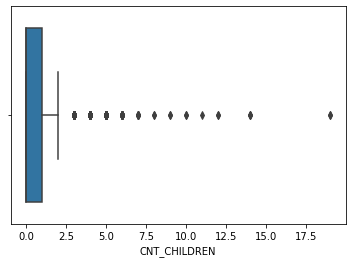

In [28]:
sns.boxplot(appdata.CNT_CHILDREN)

In [29]:
appdata.NAME_CONTRACT_TYPE.value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

In [30]:
appdata.FLAG_OWN_CAR.value_counts()

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

In [31]:
# Annutity column 
appdata.AMT_ANNUITY.isna().sum()

12

In [32]:
# imputing median value for Annutity column because the outliers are least affected by Median
appdata.AMT_ANNUITY.fillna(appdata.AMT_ANNUITY.median(),inplace=True)

In [33]:
appdata.AMT_ANNUITY.isna().sum()


0

In [34]:
appdata.AMT_ANNUITY.dtype

dtype('float64')

In [35]:
# goods_price column
appdata.AMT_GOODS_PRICE.describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [36]:
#imputing median in Goods Price column
appdata.AMT_GOODS_PRICE.fillna(appdata.AMT_GOODS_PRICE.median(),inplace=True)

In [37]:
appdata.AMT_GOODS_PRICE.isna().sum()

0

In [38]:
appdata.AMT_GOODS_PRICE.dtype

dtype('float64')

In [39]:
appdata.FLAG_OWN_REALTY.value_counts()

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

In [40]:
appdata.NAME_INCOME_TYPE.value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [41]:
appdata.NAME_EDUCATION_TYPE.value_counts()

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

In [42]:
appdata.NAME_FAMILY_STATUS.unique()

array(['Single / not married', 'Married', 'Civil marriage', 'Widow',
       'Separated', 'Unknown'], dtype=object)

In [43]:
appdata.NAME_HOUSING_TYPE.unique()

array(['House / apartment', 'Rented apartment', 'With parents',
       'Municipal apartment', 'Office apartment', 'Co-op apartment'],
      dtype=object)

#### Days Columns cannot be negative. There is nothing like negative days. So changing them to positive using abs() function 

In [44]:
# The days column cannot be negative.
appdata.DAYS_BIRTH.unique()

array([ -9461, -16765, -19046, ...,  -7951,  -7857, -25061])

In [45]:
# Changing the days values to positive using abs() function

appdata.DAYS_BIRTH=abs(appdata.DAYS_BIRTH)

In [46]:
appdata.DAYS_EMPLOYED.unique()

array([  -637,  -1188,   -225, ..., -12971, -11084,  -8694])

In [47]:
appdata.DAYS_EMPLOYED=abs(appdata.DAYS_BIRTH)

In [48]:
appdata.DAYS_ID_PUBLISH.unique()

array([-2120,  -291, -2531, ..., -6194, -5854, -6211])

In [49]:
appdata.DAYS_ID_PUBLISH=abs(appdata.DAYS_BIRTH)

In [50]:
appdata.DAYS_LAST_PHONE_CHANGE.unique()

array([-1134.,  -828.,  -815., ..., -3988., -3899., -3538.])

In [51]:
appdata.DAYS_LAST_PHONE_CHANGE=abs(appdata.DAYS_BIRTH)

In [52]:
appdata.DAYS_REGISTRATION.unique()

array([ -3648.,  -1186.,  -4260., ..., -16396., -14558., -14798.])

In [53]:
appdata.DAYS_REGISTRATION=abs(appdata.DAYS_BIRTH)

In [54]:
# checking the missing values in OCCUPATION TYPE column

appdata.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [55]:
appdata.OCCUPATION_TYPE.unique()

array(['Laborers', 'Core staff', 'Accountants', 'Managers', nan,
       'Drivers', 'Sales staff', 'Cleaning staff', 'Cooking staff',
       'Private service staff', 'Medicine staff', 'Security staff',
       'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)

In [56]:
appdata.OCCUPATION_TYPE.isna().sum()

96391

Please note the missing values in OCCUPATION TYPE are 31%, which are very high, so replacing them with mode would be like replacing all these with Labourers, that would create a bias in the data as Labourers woould be more. So I have created a new category for this missing data as unknown, so that while analysis this info can be used for the analysis that there are unknown people who are defaulters or non defaulters and can help the financial institutions about how to proceed with the loan process in future. As occupation type is important criteria for accessing the paying capacity of a customer, so the financial institutions wouldbtake care in future that there should not be such large amount of missing data.

In [57]:
# imputing null values in OCCUPATION_TYPE.

appdata.OCCUPATION_TYPE.fillna('Unknown',inplace=True)

In [58]:
import sys
sys.setrecursionlimit(10**7)


In [59]:
#appdata[appdata['OCCUPATION_TYPE'].isna()]

#### Keeping the missing values as it is in the Occupation Type column as these values are np.nan and wont be counted in the analysis. 

In [60]:
appdata.CNT_FAM_MEMBERS.unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  9.,  7.,  8., 10., 13., nan, 14.,
       12., 20., 15., 16., 11.])

In [61]:
appdata.CNT_FAM_MEMBERS.isna().sum()

2

In [62]:
appdata.CNT_FAM_MEMBERS.describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [63]:
# imputing the missing values in CNT_FAM_MEMBERS with median value

appdata.CNT_FAM_MEMBERS.fillna(appdata.CNT_FAM_MEMBERS.median(), inplace=True)

In [64]:
appdata.CNT_FAM_MEMBERS.isna().sum()

0

In [65]:
#changing CNT_FAM_MEMBERS from float to int as count of members is a whole number
appdata.CNT_FAM_MEMBERS=appdata.CNT_FAM_MEMBERS.astype(int)

In [66]:
#EXT_SOURCE_2
appdata.EXT_SOURCE_2.isna().sum()

660

In [67]:
appdata.EXT_SOURCE_2.describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

In [68]:
# imputing the missing values in EXT_SOURCE_2 WITH MEDIAN
appdata.EXT_SOURCE_2.fillna(appdata.EXT_SOURCE_2.median(),inplace=True)

In [69]:
appdata.EXT_SOURCE_2.isna().sum()

0

In [70]:
#organization type

appdata.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

Organization Type has some values marked as XNA. These are unknown. So creating a new category of Unknown in Organization Type. 
Doing this by replacing XNA with Unknown

In [71]:
# Replacing ORAGNIZATION TYPE With Unkown

appdata.ORGANIZATION_TYPE.replace('XNA','Unknown',inplace=True)

In [72]:
appdata.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
Unknown                   55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [73]:
appdata.AMT_REQ_CREDIT_BUREAU_DAY.unique()

array([ 0., nan,  1.,  3.,  2.,  4.,  5.,  6.,  9.,  8.])

In [74]:
appdata.isna().mean()

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.000000
AMT_GOODS_PRICE                0.000000
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
OCCUPATION_TYPE                0.000000
CNT_FAM_MEMBERS                0.000000
REG_REGION_NOT_LIVE_REGION     0.000000
REG_REGION_NOT_WORK_REGION     0.000000


In [75]:
appdata.shape

(307511, 30)

In [76]:
appdata.FLAG_OWN_CAR.unique()

array(['N', 'Y'], dtype=object)

## STEP 2: OUTLIERS

In [77]:
appdata.CNT_CHILDREN.value_counts()

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: CNT_CHILDREN, dtype: int64

<AxesSubplot:xlabel='CNT_CHILDREN'>

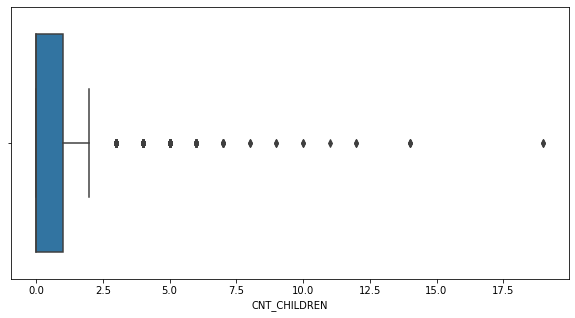

In [78]:
plt.figure(figsize=(10,5))
sns.boxplot(appdata.CNT_CHILDREN)


In [79]:
# Outlier Treatment for CNT_CHILDREN
Q3=appdata.CNT_CHILDREN.quantile(0.75)
Q1=appdata.CNT_CHILDREN.quantile(0.25)
IQR=Q3-Q1
IQR
upperbound=Q3+1.5*IQR
lowerbound=Q1-1.5*IQR
print (IQR,upperbound,lowerbound)
appdata.CNT_CHILDREN=np.where(appdata.CNT_CHILDREN>upperbound,upperbound,appdata.CNT_CHILDREN)
appdata.CNT_CHILDREN=np.where(appdata.CNT_CHILDREN<lowerbound,lowerbound,appdata.CNT_CHILDREN)

1.0 2.5 -1.5


In [80]:
x=appdata.CNT_CHILDREN>upperbound
x.value_counts(normalize=True)

False    1.0
Name: CNT_CHILDREN, dtype: float64

The boxplot above indicates that there are 4272 outliers which are above the upper whisker value of 2.5. To treat these outliers I have capped these with upper whisker.

<AxesSubplot:xlabel='CNT_CHILDREN'>

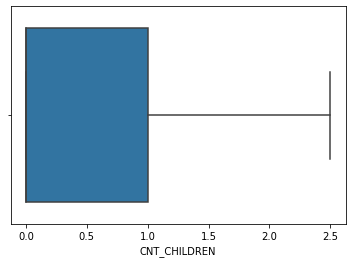

In [81]:
sns.boxplot(appdata.CNT_CHILDREN)

The boxplot above indicates that there are 4272 outliers which are above the upper whisker value of 2.5. To treat these outliers I have capped these with upper whisker.


<AxesSubplot:>

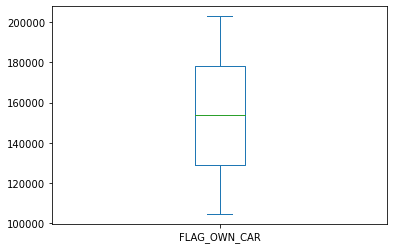

In [82]:
appdata.FLAG_OWN_CAR.value_counts().plot.box()


<AxesSubplot:>

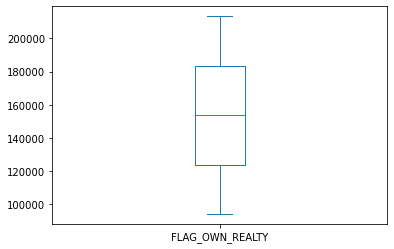

In [83]:
appdata.FLAG_OWN_REALTY.value_counts().plot.box()

<AxesSubplot:xlabel='AMT_INCOME_TOTAL'>

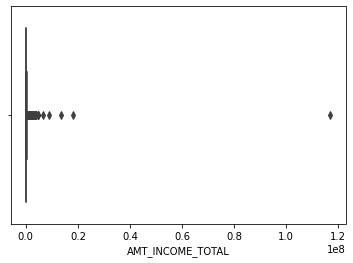

In [84]:
# Analysing outliers for the Income column

sns.boxplot(appdata.AMT_INCOME_TOTAL)

In [85]:
appdata.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [86]:
Q3=appdata.AMT_INCOME_TOTAL.quantile(0.75)
Q1=appdata.AMT_INCOME_TOTAL.quantile(0.25)
IQR=Q3-Q1
upperbound=Q3+1.5*IQR
lowerbound=Q1-1.5*IQR
print (IQR,upperbound,lowerbound)

90000.0 337500.0 -22500.0


In [87]:
# calculating the number of outliers
x=appdata.AMT_INCOME_TOTAL>upperbound
x.value_counts(normalize=True)

False    0.954359
True     0.045641
Name: AMT_INCOME_TOTAL, dtype: float64

In [88]:
y=appdata.AMT_INCOME_TOTAL<lowerbound
y.value_counts()

False    307511
Name: AMT_INCOME_TOTAL, dtype: int64

The boxplot above indicates that there are 14035 outliers which are above the upper whisker value of 337500.This is 4.5% of the total data. Again we can handle these outliers in 2 ways:

1. We can drop these outliers from the dataframe
2. Also we can impute these outliers with the upper whisker value i.e. the upper bound value. So that all the outliers in line.

In this case my strategy would be to allign the outliers with the upper whisker value i.e. the upperbound value. If I drop these outliers then the Annual Income being a very inportant column with respect to the Target column, we may loose some important information. Also there are a lot of negative outliers also in the data, so by adjusting the outliers we can get annual income in a proper context without loosing valuable data.

In [89]:
# treating outliers in Income Column
appdata.AMT_INCOME_TOTAL=np.where(appdata.AMT_INCOME_TOTAL>upperbound,upperbound,appdata.AMT_INCOME_TOTAL)

<AxesSubplot:xlabel='AMT_INCOME_TOTAL'>

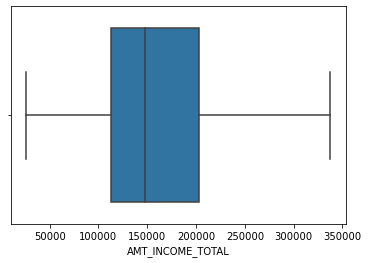

In [90]:
sns.boxplot(appdata.AMT_INCOME_TOTAL)

<AxesSubplot:xlabel='AMT_GOODS_PRICE'>

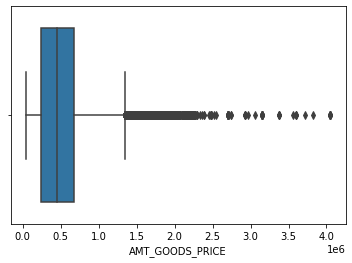

In [91]:
# Analysing outliers for the Goods Price

sns.boxplot(appdata.AMT_GOODS_PRICE)

In [92]:

Q3=appdata.AMT_GOODS_PRICE.quantile(0.75)
Q1=appdata.AMT_GOODS_PRICE.quantile(0.25)
IQR=Q3-Q1
upperbound=Q3+1.5*IQR
lowerbound=Q1-1.5*IQR
print (IQR,upperbound,lowerbound)

441000.0 1341000.0 -423000.0


In [93]:
# calculating the number of outliers
x=appdata.AMT_GOODS_PRICE>upperbound
x.value_counts(normalize=True)

False    0.952106
True     0.047894
Name: AMT_GOODS_PRICE, dtype: float64

In [94]:
y=appdata.AMT_GOODS_PRICE<lowerbound
y.value_counts()

False    307511
Name: AMT_GOODS_PRICE, dtype: int64

The boxplot above indicates that there are 14728 outliers which are above the upper whisker value of 1341000 which are nearly 4.7% of the entire data.Also there are no negative ouliers that is no outliers below the lower whisker. If we delete these outliers the data would be affected as a lot of rows would be deleted that may have valuable information. So we can bring all the outliers at the upper whisker level by imputing their value to upperbound.

In [95]:
# Treatment of GOODS_PRICE column outliers
appdata.AMT_GOODS_PRICE=np.where(appdata.AMT_GOODS_PRICE>upperbound,upperbound,appdata.AMT_GOODS_PRICE)

<AxesSubplot:xlabel='AMT_GOODS_PRICE'>

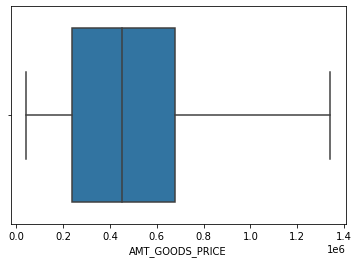

In [96]:
sns.boxplot(appdata.AMT_GOODS_PRICE)

<AxesSubplot:xlabel='AMT_CREDIT'>

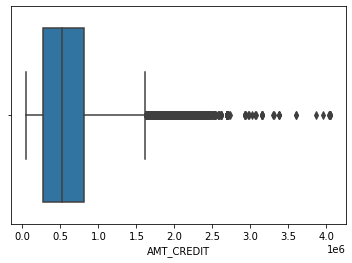

In [97]:
# Outliers in Credit column

sns.boxplot(appdata.AMT_CREDIT)

In [98]:
appdata.AMT_CREDIT.describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [99]:
Q3=appdata.AMT_CREDIT.quantile(0.75)
Q1=appdata.AMT_CREDIT.quantile(0.25)
IQR=Q3-Q1
upperbound=Q3+1.5*IQR
lowerbound=Q1-1.5*IQR
print (IQR,upperbound,lowerbound)

538650.0 1616625.0 -537975.0


In [100]:
x=appdata.AMT_CREDIT>upperbound
x.value_counts(normalize=True)

False    0.978661
True     0.021339
Name: AMT_CREDIT, dtype: float64

In [101]:
y=appdata.AMT_CREDIT>lowerbound
y.value_counts()

True    307511
Name: AMT_CREDIT, dtype: int64

The boxplot above indicates that there are 6562 outliers which are above the upper whisker value of 1616625 which is harly 2% of the total values in the Credit column. To treat the outliers in Credit we shall impute these outliers with upper whisker i.e. the upper bound

In [102]:
# treating the outliers in Credit Column
appdata.AMT_CREDIT=np.where(appdata.AMT_CREDIT>upperbound,upperbound,appdata.AMT_CREDIT)

<AxesSubplot:xlabel='AMT_CREDIT'>

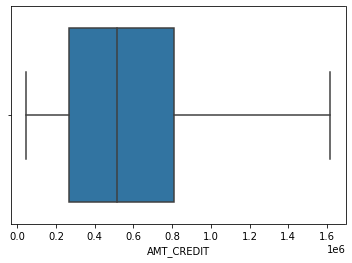

In [103]:
sns.boxplot(appdata.AMT_CREDIT)

<AxesSubplot:xlabel='AMT_ANNUITY'>

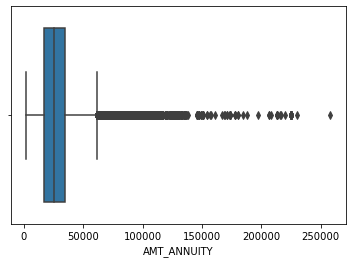

In [104]:
# outliers in ANNUITY column

sns.boxplot(appdata.AMT_ANNUITY)

In [105]:
appdata.AMT_ANNUITY.describe()

count    307511.000000
mean      27108.487841
std       14493.461065
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [106]:
Q3=appdata.AMT_ANNUITY.quantile(0.75)
Q1=appdata.AMT_ANNUITY.quantile(0.25)
IQR=Q3-Q1
upperbound=Q3+1.5*IQR
lowerbound=Q1-1.5*IQR
print (IQR,upperbound,lowerbound)

18072.0 61704.0 -10584.0


In [107]:
x=appdata.AMT_ANNUITY>upperbound
x.value_counts(normalize=True)

False    0.975598
True     0.024402
Name: AMT_ANNUITY, dtype: float64

The boxplot above indicates that there are 7504 outliers which are above the upper whisker value of 61704 which are 2.4% of the total values in the Column.In this case to treat the outliers we shall cap the values to upper whisker

In [108]:
# treating the outliers in ANNUITY
appdata.AMT_ANNUITY=np.where(appdata.AMT_ANNUITY>upperbound,upperbound,appdata.AMT_ANNUITY)

<AxesSubplot:xlabel='AMT_ANNUITY'>

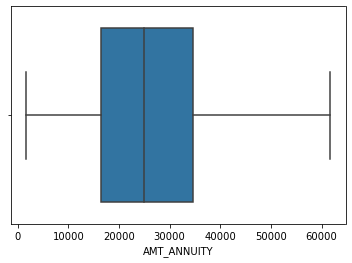

In [109]:
sns.boxplot(appdata.AMT_ANNUITY)

<AxesSubplot:xlabel='REGION_POPULATION_RELATIVE'>

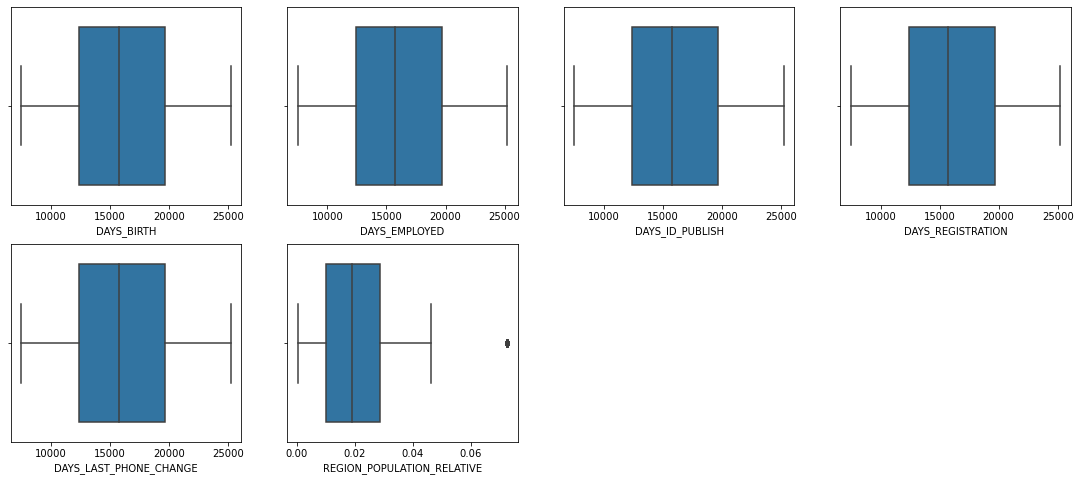

In [110]:
# Checking outliers in DAYS columsn and REGION_POPULATION_RELATIVE
plt.figure(figsize=(19,8))
plt.subplot(2,4,1)
sns.boxplot(appdata.DAYS_BIRTH)
plt.subplot(2,4,2)
sns.boxplot(appdata.DAYS_EMPLOYED)
plt.subplot(2,4,3)
sns.boxplot(appdata.DAYS_ID_PUBLISH)
plt.subplot(2,4,4)
sns.boxplot(appdata.DAYS_REGISTRATION)
plt.subplot(2,4,5)
sns.boxplot(appdata.DAYS_LAST_PHONE_CHANGE)
plt.subplot(2,4,6)
sns.boxplot(appdata.REGION_POPULATION_RELATIVE)

From the boxplots above it is evident that there is only 1 outlier in the REGION_POPULATION_RELATIVE column whereas no outliers are found in other columns

<AxesSubplot:xlabel='CNT_FAM_MEMBERS'>

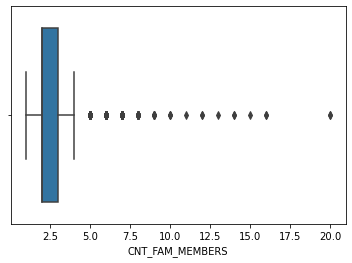

In [111]:
# CNT_FAM_MEMBERS

sns.boxplot(appdata.CNT_FAM_MEMBERS)

In [112]:
Q3=appdata.CNT_FAM_MEMBERS.quantile(0.75)
Q1=appdata.CNT_FAM_MEMBERS.quantile(0.25)
IQR=Q3-Q1
upperbound=Q3+1.5*IQR
lowerbound=Q1-1.5*IQR
print (IQR,upperbound,lowerbound)

1.0 4.5 0.5


In [113]:
x=appdata.CNT_FAM_MEMBERS>upperbound
x.value_counts(normalize=True)

False    0.98697
True     0.01303
Name: CNT_FAM_MEMBERS, dtype: float64

This indicates that there are 4007 outliers which are above the upper whisker value of 4.5 which are 1.3% of the total values in the column.

## STEP 3: Binning

In [114]:
#creating bins for age column
#creating a new column age by converting DAYS_BIRTH into years

appdata['Age']=round(appdata.DAYS_BIRTH/365)


In [115]:
appdata.Age=pd.cut(appdata.Age,bins=[20,30,40,50,60,70],labels=['<30','30-40','40-50','50-60','>60'])

In [116]:
appdata.Age.value_counts()

30-40    82770
40-50    75509
50-60    67955
<30      48869
>60      32408
Name: Age, dtype: int64

<AxesSubplot:>

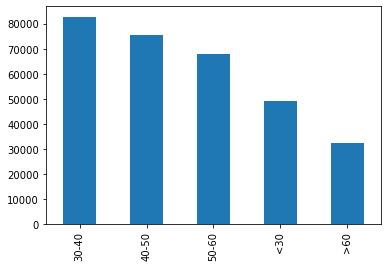

In [117]:
appdata.Age.value_counts().plot.bar()

The bar plot above describes that there are mode middle aged people looking for loans, followed by Young Adults and the old age category

In [118]:
# creating bins for income column

appdata['INCOME_CATEGORY']=pd.cut(appdata.AMT_INCOME_TOTAL,bins=5,labels=['Very Low','Low','Medium','High','Very High'])

In [119]:
appdata.INCOME_CATEGORY.value_counts()

Low          119923
Medium        82456
High          42716
Very Low      35371
Very High     27045
Name: INCOME_CATEGORY, dtype: int64

<AxesSubplot:>

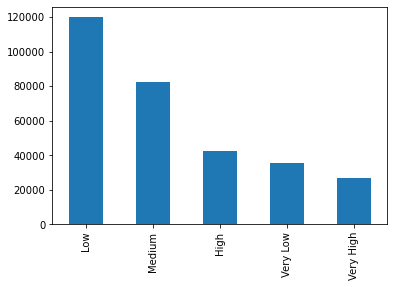

In [120]:
appdata.INCOME_CATEGORY.value_counts().plot.bar()

The bar plot indicates that the people with very low income are the ones who approach bank and financial institutions for loans.

In [121]:
# creating bins for Credit column

In [122]:
appdata['CREDIT_CATEGORY']=pd.cut(appdata.AMT_CREDIT,bins=5,labels=['Very Low','Low','Medium','High','Very High'])

In [123]:
appdata.CREDIT_CATEGORY.value_counts()

Very Low     108753
Low           86100
Medium        61852
High          31749
Very High     19057
Name: CREDIT_CATEGORY, dtype: int64

<AxesSubplot:>

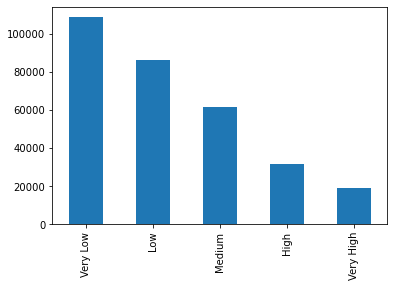

In [124]:
appdata.CREDIT_CATEGORY.value_counts().plot.bar()

The bar plot indicated thatmost of the people have applied for small loan amounts rather the credit taken by people is very less. 

## STEP 4 Imbalance Percentage

In [125]:
# calculating the imbalance percentage for the Target column
appdata.TARGET.value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

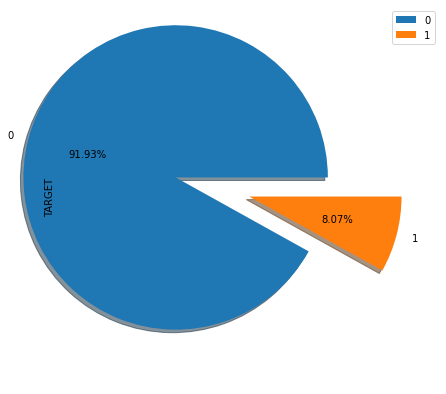

In [126]:
plt.figure(figsize=(8,7))
appdata.TARGET.value_counts(normalize=True).plot.pie(autopct='%.2f%%',explode=[0.5,0],shadow=True)
plt.legend()

This Pie plot on target variable indicates that out of the total data the number of defaulters are very less (8.07% of the total data) as compared the non defaulters (91.93% of the total data).

In [127]:
#Imbalance percentage in gender 

appdata.CODE_GENDER.value_counts(normalize=True)

F    0.658357
M    0.341643
Name: CODE_GENDER, dtype: float64

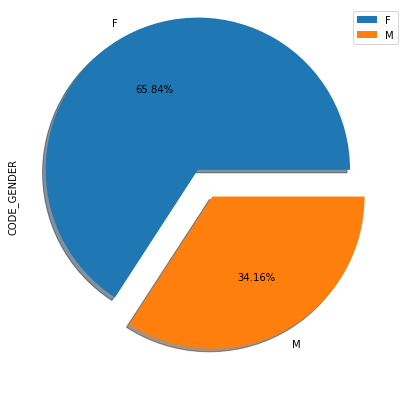

In [128]:
plt.figure(figsize=(8,7))
appdata.CODE_GENDER.value_counts(normalize=True).plot.pie(autopct='%.2f%%',explode=[0.2,0],shadow=True)
plt.legend()

This Pie plot on gender indicates that out of the total data there are 65.84% females and 34.16% males under analysis.

## STEP 5 Univariate Analysis

In [129]:
# Divide the data set into 2 subsets one for Target value=1(defaulters) and other for target value=0(non defaulters)

In [130]:
appdata.head()
appdata_1=appdata[appdata.TARGET==1]  # subset dataframe for defaulters
appdata_0=appdata[appdata.TARGET==0]  # subset dataframe for non defaulters

In [131]:
appdata_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,EXT_SOURCE_2,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_DAY,Age,INCOME_CATEGORY,CREDIT_CATEGORY
0,100002,1,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,9461,9461,9461,1,Laborers,1,0,0,0,Business Entity Type 3,0.262949,9461,0.0,<30,Medium,Low
26,100031,1,Cash loans,F,N,Y,0.0,112500.0,979992.0,27076.5,702000.0,Working,Secondary / secondary special,Widow,House / apartment,0.018029,18724,18724,18724,18724,1,Cooking staff,1,0,0,0,Business Entity Type 3,0.548477,18724,0.0,50-60,Low,Medium
40,100047,1,Cash loans,M,N,Y,0.0,202500.0,1193580.0,35028.0,855000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,17482,17482,17482,17482,1,Laborers,2,0,0,0,Business Entity Type 3,0.306841,17482,0.0,40-50,Medium,High
42,100049,1,Cash loans,F,N,N,0.0,135000.0,288873.0,16258.5,238500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,13384,13384,13384,13384,1,Sales staff,2,0,0,0,Self-employed,0.674203,13384,0.0,30-40,Low,Very Low
81,100096,1,Cash loans,F,N,Y,0.0,81000.0,252000.0,14593.5,252000.0,Pensioner,Secondary / secondary special,Married,House / apartment,0.028663,24794,24794,24794,24794,1,Unknown,2,0,0,0,Unknown,0.023952,24794,0.0,>60,Very Low,Very Low


In [132]:
appdata_0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,EXT_SOURCE_2,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_DAY,Age,INCOME_CATEGORY,CREDIT_CATEGORY
1,100003,0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,16765,16765,16765,16765,1,Core staff,2,0,0,0,School,0.622246,16765,0.0,40-50,High,High
2,100004,0,Revolving loans,M,Y,Y,0.0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,19046,19046,19046,1,Laborers,1,0,0,0,Government,0.555912,19046,0.0,50-60,Very Low,Very Low
3,100006,0,Cash loans,F,N,Y,0.0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,19005,19005,19005,1,Laborers,2,0,0,0,Business Entity Type 3,0.650442,19005,NaN,50-60,Low,Very Low
4,100007,0,Cash loans,M,N,Y,0.0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,19932,19932,19932,1,Core staff,1,0,0,0,Religion,0.322738,19932,0.0,50-60,Low,Low
5,100008,0,Cash loans,M,N,Y,0.0,99000.0,490495.5,27517.5,454500.0,State servant,Secondary / secondary special,Married,House / apartment,0.035792,16941,16941,16941,16941,1,Laborers,2,0,0,0,Other,0.354225,16941,0.0,40-50,Low,Low


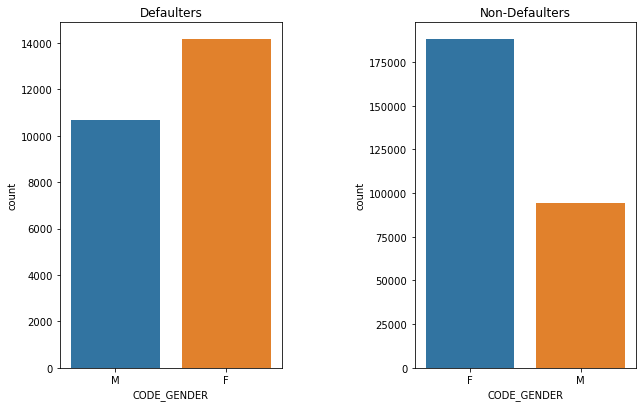

In [133]:
# TARGET vs CODE_GENDER
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title('Defaulters')
sns.countplot(appdata_1.CODE_GENDER)

plt.subplot(1,2,2)
plt.title('Non-Defaulters')
sns.countplot(appdata_0.CODE_GENDER)

plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.6,hspace=1.4)

In [134]:
appdata.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

The above barplot indicates that The count for female defaulters are around 14000 whereas count for female non defaulters is around 185000. Whereas the number of male defaulters are around 11000 and male non defaulters count is around 98000 approx. So the percentage of male defaulters are (11000/105059*100=10.7%) where as the percentage of female defaulters is (14000/202452*100=6.9%). The percentage of male non defaluters is approx(100-10.7=89.3%) and approx female non defaulters=(100-6.9=93.1%)

So owerall data indicates the Males have more tendency to default a loan than females

<AxesSubplot:title={'center':'Non Defaulters'}, xlabel='NAME_EDUCATION_TYPE', ylabel='count'>

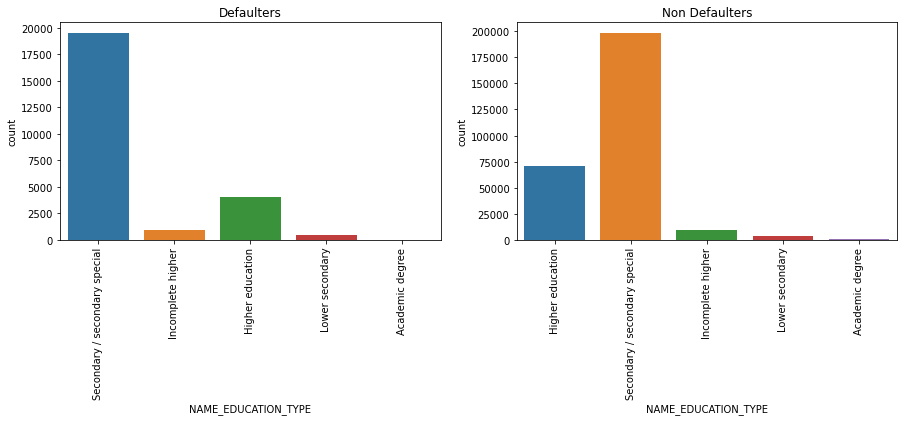

In [135]:
# EDUCATION TYPE

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title('Defaulters')
plt.xticks(rotation=90)
sns.countplot(appdata_1.NAME_EDUCATION_TYPE)


plt.subplot(1,2,2)
plt.title('Non Defaulters')
plt.xticks(rotation=90)
sns.countplot(appdata_0.NAME_EDUCATION_TYPE)



In [136]:
appdata_1.NAME_EDUCATION_TYPE.value_counts(normalize=True)

Secondary / secondary special    0.786465
Higher education                 0.161490
Incomplete higher                0.035126
Lower secondary                  0.016798
Academic degree                  0.000121
Name: NAME_EDUCATION_TYPE, dtype: float64

In [137]:
appdata_0.NAME_EDUCATION_TYPE.value_counts(normalize=True)

Secondary / secondary special    0.703491
Higher education                 0.250646
Incomplete higher                0.033270
Lower secondary                  0.012024
Academic degree                  0.000570
Name: NAME_EDUCATION_TYPE, dtype: float64

1. It has been observed that the maximum defaulters are in education category of Secondary/Secondary Special which account to 79% of the total defaulters. This is the indication that people who have education till secondary level earn less or have low source of income and are not able to pay the loans on time
2. Also the non defualters are also from the education category of Secondary/Secondary Special which account tp 70% of the total non defaulters. 

The analysis is very close for defaulters and non defaulters when it comes to Education Type

<AxesSubplot:title={'center':'Non Defaulters'}, xlabel='Age', ylabel='count'>

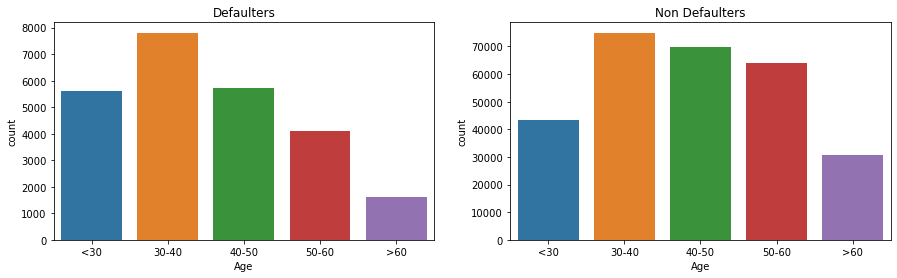

In [138]:
#Target vs AGE

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title('Defaulters')
sns.countplot(appdata_1.Age)

plt.subplot(1,2,2)
plt.title('Non Defaulters')
sns.countplot(appdata_0.Age)

In [139]:
appdata_1.Age.value_counts(normalize=True)

30-40    0.314562
40-50    0.230614
<30      0.225297
50-60    0.165237
>60      0.064290
Name: Age, dtype: float64

In [140]:
appdata_0.Age.value_counts(normalize=True)

30-40    0.265174
40-50    0.246860
50-60    0.225880
<30      0.153089
>60      0.108997
Name: Age, dtype: float64

1. It has been observed that nearly 31% of defaulters are in age group of 30-40 years followed by people in age group of 40-50 years. Also the graph indicates that these age group people are mostly defaulters.
2. Also it has been observed that most non defaulters are in the age group of 30-40 years and 40-50 years.
3. People of older age are very less in defaulters category, also the count for old age people in non defaulters is less. So we can say that old age people are the best option for the banks to provide loan.  
4. Even people of age less than 30 years are also less in defaulters and non defaulters.

<AxesSubplot:title={'center':'Non Defaulters'}, xlabel='INCOME_CATEGORY', ylabel='count'>

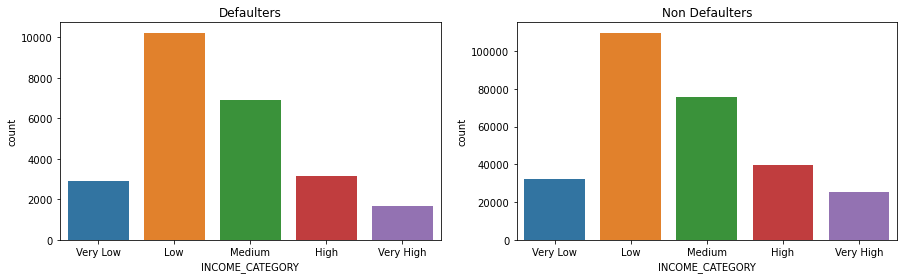

In [141]:
#Target vs Income Category

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title('Defaulters')
sns.countplot(appdata_1.INCOME_CATEGORY)

plt.subplot(1,2,2)
plt.title('Non Defaulters')
sns.countplot(appdata_0.INCOME_CATEGORY)

The plot indicates that the people with low income are the ones who are defaulters. This when compared with a real life scenario, the people with low salary are the ones in need of loan and mostly they are not able to payback the same.These low income group people are followed by medium, high, very low and very high income categories.

On the other hand the non defaulters are also seen to be following the same trend as defaulters. 

In general it is all the payback capacity of a person that makes a defaulter or a non defaulter. A person who has low income is in need of loan, takes credit and may not be able to pay back on time, so that person becomes a defaulter. But at the same time a low earning person may need a loan in need and can also pay the loan on time as well, so he is a non defaulter.

<AxesSubplot:title={'center':'Non Defaulters'}, xlabel='NAME_INCOME_TYPE', ylabel='count'>

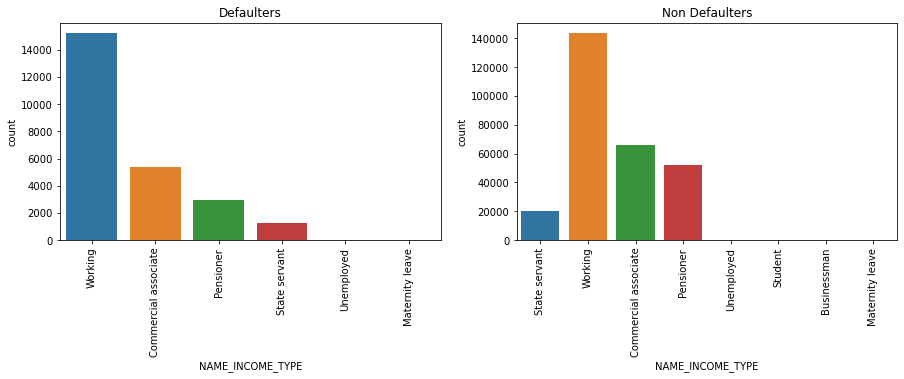

In [142]:
#Target vs Income Type

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title('Defaulters')
plt.xticks(rotation=90)
sns.countplot(appdata_1.NAME_INCOME_TYPE)

plt.subplot(1,2,2)
plt.title('Non Defaulters')
plt.xticks(rotation=90)
sns.countplot(appdata_0.NAME_INCOME_TYPE)

The plots indicate that maximum defaulters and non defaulters fall in category of working class people. Or in other words we can say, most loan applications are from working class people. 

<AxesSubplot:title={'center':'Non Defaulters'}>

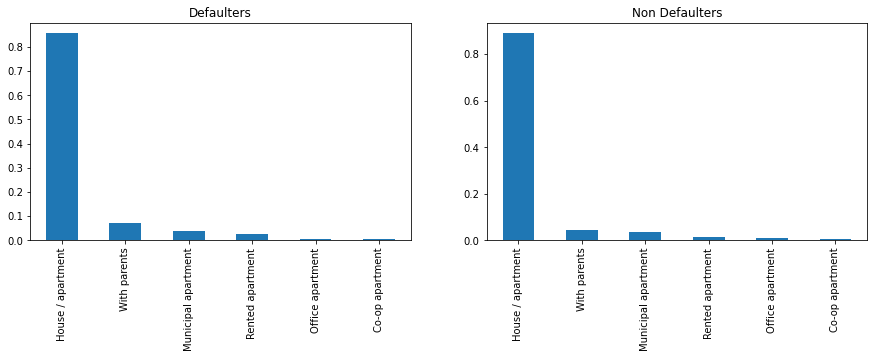

In [143]:
#Target vs Housing Type
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title('Defaulters')
plt.xticks(rotation=90)
appdata_1.NAME_HOUSING_TYPE.value_counts(normalize=True).plot.bar()
#sns.countplot(appdata_1.NAME_HOUSING_TYPE)

plt.subplot(1,2,2)
plt.title('Non Defaulters')
plt.xticks(rotation=90)
appdata_0.NAME_HOUSING_TYPE.value_counts(normalize=True).plot.bar()
#sns.countplot(appdata_0.NAME_HOUSING_TYPE)


The data indicates that maximum people stay in their own house/appratments in both the defaulters and non defaulters category

<AxesSubplot:title={'center':'Non Defaulters'}, xlabel='NAME_FAMILY_STATUS', ylabel='count'>

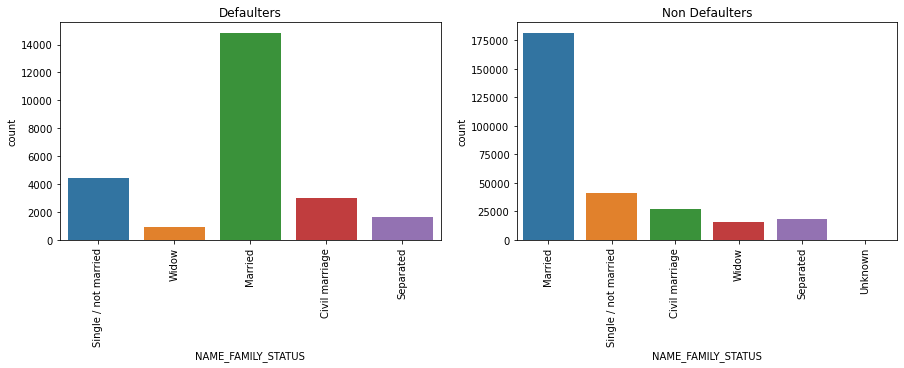

In [144]:
#Target vs Family Status

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title('Defaulters')
plt.xticks(rotation=90)
sns.countplot(appdata_1.NAME_FAMILY_STATUS)

plt.subplot(1,2,2)
plt.title('Non Defaulters')
plt.xticks(rotation=90)
sns.countplot(appdata_0.NAME_FAMILY_STATUS)

The graph indicates that most of the defaulters fall in married category. Also the same is true for the non defaulters as well.

<AxesSubplot:title={'center':'Non Defaulters'}, xlabel='CREDIT_CATEGORY', ylabel='count'>

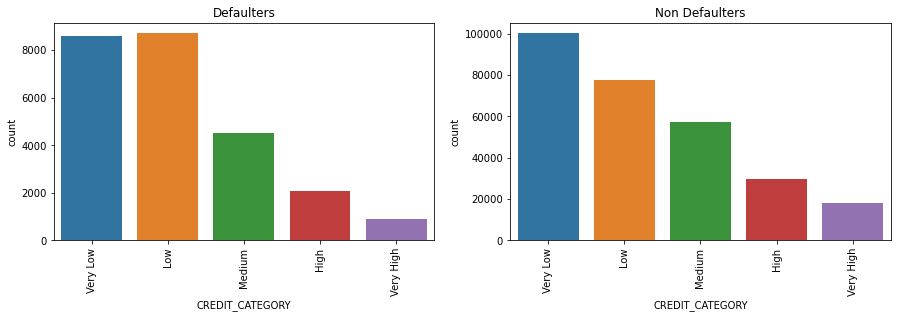

In [145]:
#Target vs CREDIT CATEGORY 

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title('Defaulters')
plt.xticks(rotation=90)
sns.countplot(appdata_1.CREDIT_CATEGORY)

plt.subplot(1,2,2)
plt.title('Non Defaulters')
plt.xticks(rotation=90)
sns.countplot(appdata_0.CREDIT_CATEGORY)

The graph clearly indicated that the people who have very low and low credit amount are more in number in defaulters. Also the people who have very low credit are also high in count under non defaulters

<AxesSubplot:title={'center':'Non Defaulters'}>

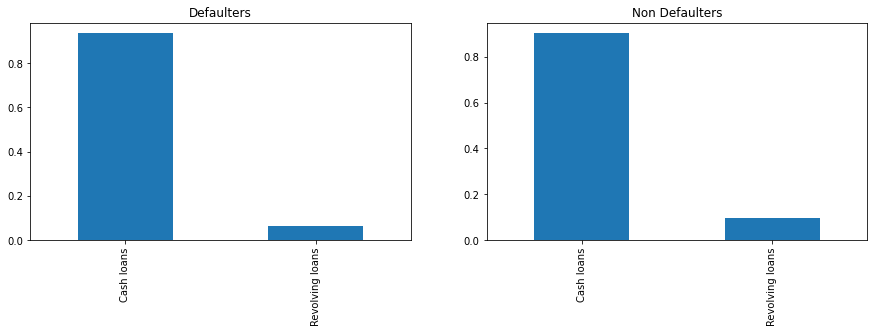

In [146]:
#Target vs NAME_CONTRACT_TYPE

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title('Defaulters')
plt.xticks(rotation=90)
appdata_1.NAME_CONTRACT_TYPE.value_counts(normalize=True).plot.bar()
#sns.countplot(appdata_1.NAME_CONTRACT_TYPE)

plt.subplot(1,2,2)
plt.title('Non Defaulters')
plt.xticks(rotation=90)
appdata_0.NAME_CONTRACT_TYPE.value_counts(normalize=True).plot.bar()
#sns.countplot(appdata_0.NAME_CONTRACT_TYPE)

The graphs indicate that mostly cash loans are given to the people in defaulter and non defaulter category

<AxesSubplot:title={'center':'Non Defaulters'}, xlabel='OCCUPATION_TYPE', ylabel='count'>

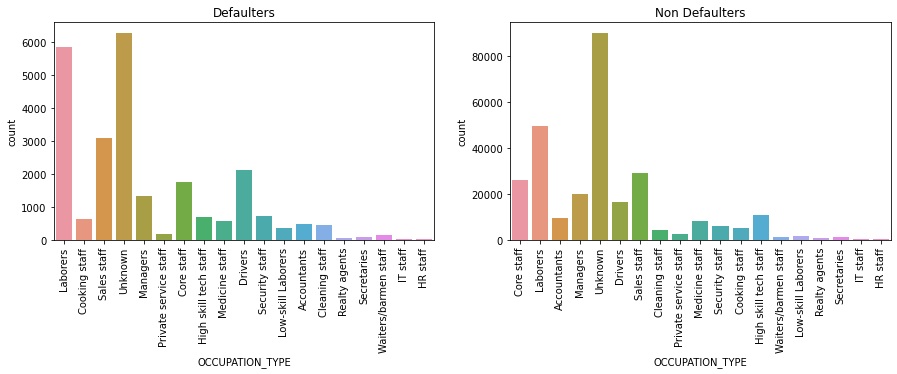

In [147]:
# TARGET vv OCCUPATION TYPE

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title('Defaulters')
plt.xticks(rotation=90)
sns.countplot(appdata_1.OCCUPATION_TYPE)

plt.subplot(1,2,2)
plt.title('Non Defaulters')
plt.xticks(rotation=90)
sns.countplot(appdata_0.OCCUPATION_TYPE)

The plot indicates that the labourers occupation type is more in defaulters and non defalters

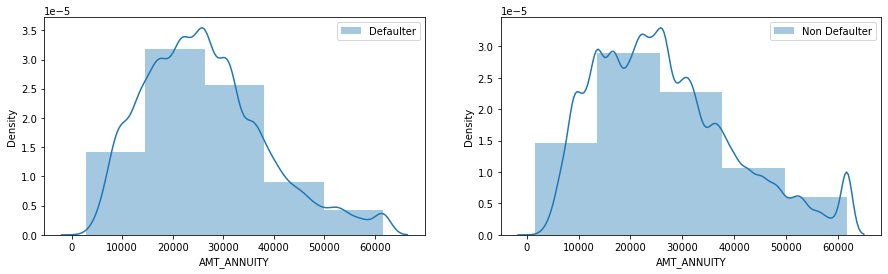

In [148]:
# AMT_ANNUITY
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.distplot(appdata_1.AMT_ANNUITY,label='Defaulter',bins=5)
plt.legend()


plt.subplot(1,2,2)
sns.distplot(appdata_0.AMT_ANNUITY,label='Non Defaulter',bins=5)
plt.legend()


plt.show()

The graph of annuity indicates that the spread of annuity is more between 15000 to 25000 and it gradually decreases over increase in annuity value. So, the people having annuity value between 15000 and 25000 are the ones who have defaulted the loan payment.
On the other hand in case of non defaulters there is a peak in density between annuity values of 15000 to 28000 and people in this annuity range are non defaulters.

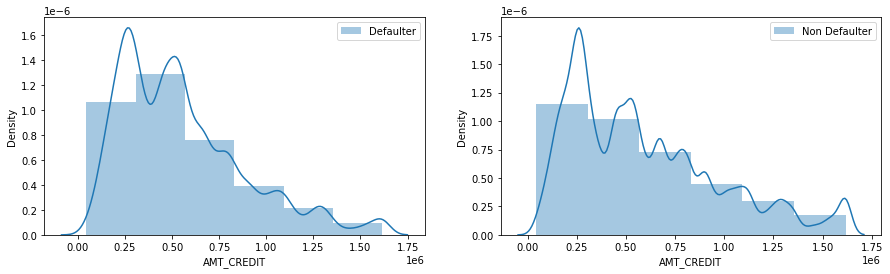

In [149]:
#AMT_CREDIT
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.distplot(appdata_1.AMT_CREDIT,label='Defaulter',bins=6)
plt.legend()

plt.subplot(1,2,2)
sns.distplot(appdata_0.AMT_CREDIT,label='Non Defaulter',bins=6)
plt.legend()
plt.show()

Under defaulters the credit values have peaks at 250000 and 500000.
In non defaulters the credit values have peaks at 250000 then at 500000 and still peaks keep on having their rise and falls with peaks at 750000,1250000 and so on but the density keeps on decreasing post 500000.

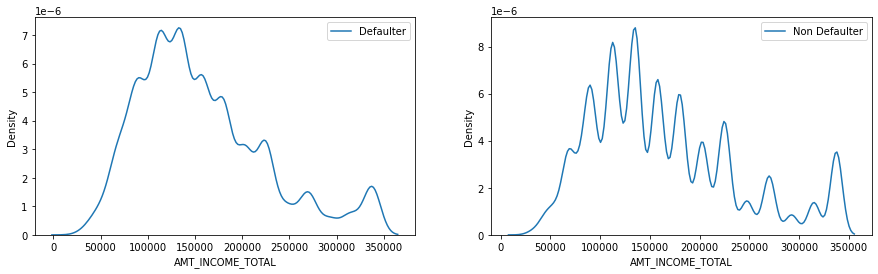

In [150]:
#AMT_INCOME_TOTAL
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.distplot(appdata_1.AMT_INCOME_TOTAL,label='Defaulter',hist=False)
plt.legend()

plt.subplot(1,2,2)
sns.distplot(appdata_0.AMT_INCOME_TOTAL,label='Non Defaulter',hist=False)

plt.legend()
plt.show()

It has been observed that maximum defaulters are those people in whose income is in range 1 to 1.5 lakhs. Also as the income increases to 3 and 3.5 lakhs the count of defaulters decreases.
On the contrary in non defaulters there is a mixed trend. People with high and low income group are all non defaulters.

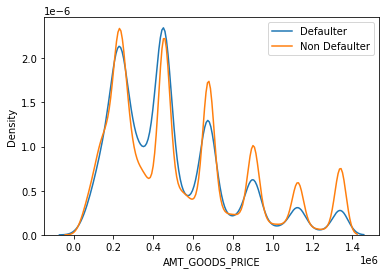

In [151]:
#AMT_GOODS_PRICE
sns.distplot(appdata_1.AMT_GOODS_PRICE,label='Defaulter',hist=False)
sns.distplot(appdata_0.AMT_GOODS_PRICE,label='Non Defaulter',hist=False)
plt.legend()
plt.show()

The curve indicates that both defaulters and non defaulters show a similar trend when compared on basis of price of goods.

## STEP 6: BIVARIATE ANALYSIS

## Correlation Matrix for defaulters

In [239]:
corrmatrix=appdata_1.select_dtypes('float')

In [240]:
corr_matrix_def=corrmatrix.corr(method='pearson')

In [241]:
corr_matrix_def=corr_matrix_def.unstack().sort_values(ascending=False).drop_duplicates()

In [242]:
corr_matrix_def.head(11)

CNT_CHILDREN                CNT_CHILDREN        1.000000
AMT_GOODS_PRICE             AMT_CREDIT          0.981837
AMT_ANNUITY                 AMT_GOODS_PRICE     0.760287
                            AMT_CREDIT          0.760123
                            AMT_INCOME_TOTAL    0.436918
AMT_GOODS_PRICE             AMT_INCOME_TOTAL    0.357696
AMT_INCOME_TOTAL            AMT_CREDIT          0.356199
REGION_POPULATION_RELATIVE  EXT_SOURCE_2        0.169839
EXT_SOURCE_2                AMT_INCOME_TOTAL    0.144566
                            AMT_GOODS_PRICE     0.130209
                            AMT_CREDIT          0.119974
dtype: float64

## Correlation Matrix for Non Defaulters

In [243]:
corrmatrix_0=appdata_0.select_dtypes('float')
corr_matrix_nondef=corrmatrix_0.corr(method='pearson')
corr_matrix_nondef=corr_matrix_nondef.unstack().sort_values(ascending=False).drop_duplicates()
corr_matrix_nondef.head(11)

CNT_CHILDREN                CNT_CHILDREN                  1.000000
AMT_CREDIT                  AMT_GOODS_PRICE               0.985582
AMT_GOODS_PRICE             AMT_ANNUITY                   0.797315
AMT_ANNUITY                 AMT_CREDIT                    0.794808
AMT_INCOME_TOTAL            AMT_ANNUITY                   0.492921
AMT_GOODS_PRICE             AMT_INCOME_TOTAL              0.417592
AMT_INCOME_TOTAL            AMT_CREDIT                    0.414309
REGION_POPULATION_RELATIVE  EXT_SOURCE_2                  0.198285
AMT_INCOME_TOTAL            REGION_POPULATION_RELATIVE    0.190425
EXT_SOURCE_2                AMT_INCOME_TOTAL              0.172153
                            AMT_GOODS_PRICE               0.134824
dtype: float64

<AxesSubplot:title={'center':'Non Defaulters'}, xlabel='AMT_INCOME_TOTAL', ylabel='AMT_CREDIT'>

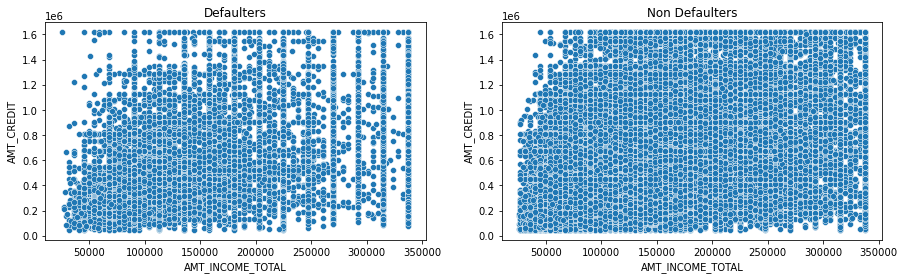

In [152]:
#income vc credit
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title('Defaulters')
sns.scatterplot(x=appdata_1.AMT_INCOME_TOTAL,y=appdata_1.AMT_CREDIT)


plt.subplot(1,2,2)
plt.title('Non Defaulters')
sns.scatterplot(appdata_0.AMT_INCOME_TOTAL,appdata_0.AMT_CREDIT)

In [153]:
print ("Correlation b/w Income and Credit for defaulters",appdata_1.AMT_INCOME_TOTAL.corr(appdata_1.AMT_CREDIT))
print ("Correlation b/w Income and Credit for non defaulters",appdata_0.AMT_INCOME_TOTAL.corr(appdata_0.AMT_CREDIT))

Correlation b/w Income and Credit for defaulters 0.35619877358960733
Correlation b/w Income and Credit for non defaulters 0.4143085292496583


This scatter plot basically provides us how the two variables are realted to each other. 
1. The Defauters data indicate that, the corelation between the income and credit is not that great. It is a positive correlation but here is no linear relation between them
2. The non defaulters scatter plot also indicates that there is no linear relation between Income and Credit

Generally what happens is that if the income of a person is high, he gets a higher credit and if the income of a person is low that person gets lower credit. But here such kind of relation is not established as per the dataset. 

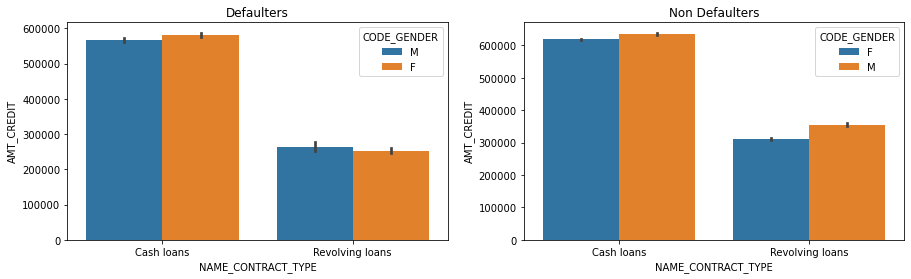

In [154]:
# gender and contract type
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title('Defaulters')
sns.barplot(x=appdata_1.NAME_CONTRACT_TYPE,y=appdata_1.AMT_CREDIT,hue=appdata_1.CODE_GENDER)

plt.subplot(1,2,2)
plt.title('Non Defaulters')
sns.barplot(x=appdata_0.NAME_CONTRACT_TYPE,y=appdata_0.AMT_CREDIT,hue=appdata_0.CODE_GENDER)

plt.show()

1. The graph clearly indicates that there are more females who get cash loans as compared to males in the defaulters category. Whereas the revolving loans are offered more to men than females.
2. In the non defaulters category the cash loans and revolving loans are more given to male and less to females.

So we can say that banks can trust males while giving cash loans and revolving loans as they are non defaulters. In case of defaulters banks should be more careful about females while giving cash loans and careful for males while giving revolving loans

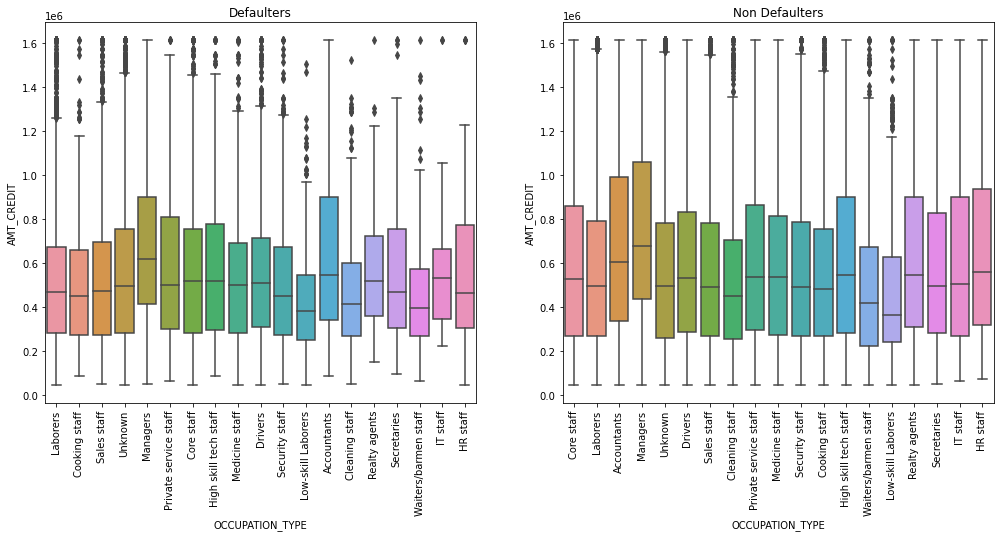

In [155]:
#OCCUPATION TYPE vs CREDIT
plt.figure(figsize=(17,7))
plt.subplot(1,2,1)
plt.title('Defaulters')
sns.boxplot(appdata_1.OCCUPATION_TYPE,appdata_1.AMT_CREDIT)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title('Non Defaulters')
sns.boxplot(appdata_0.OCCUPATION_TYPE,appdata_0.AMT_CREDIT)
plt.xticks(rotation=90)

plt.show()

1. In defaulters 
    - It is seen that Accountants and Managers have come out to be ones who have more amount of credit with them and they are defaulters of loan too. So Banks and financial institutions should be more careful and alert in inspecting/interrogating the assets and paying capacity of managers and accountants while offering loans.
    - In the same manner the next category of occupation that has more credit amount is Private service staff, high skill service staff followed by HR Staff, secretaries and drivers. As per analysis these categories tend to default the loan payment. So banks need to be careful for them
    - The remaining categories are also defaulters but have less loan amounts with them
2. Non Defaulters
    - It is evident that managers and accountants are the ones who have taken maximum loans and have paid the loans on time.
    
So in short the banks should be more vigilant for managers and accountants while giving loan.

<AxesSubplot:title={'center':'Non Defaulter'}, xlabel='AMT_ANNUITY', ylabel='AMT_INCOME_TOTAL'>

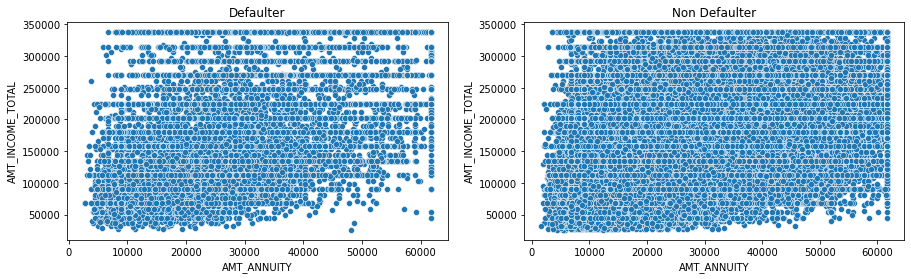

In [156]:
#ANNUITY vs INCOME TOTAL
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title('Defaulter')
sns.scatterplot(appdata_1.AMT_ANNUITY,appdata_1.AMT_INCOME_TOTAL)

plt.subplot(1,2,2)
plt.title('Non Defaulter')
sns.scatterplot(appdata_0.AMT_ANNUITY,appdata_0.AMT_INCOME_TOTAL)



In [157]:
print ("Correlation b/w Income and Annuity for defaulters",appdata_1.AMT_INCOME_TOTAL.corr(appdata_1.AMT_ANNUITY))
print ("Correlation b/w Income and Annuity for non defaulters",appdata_0.AMT_INCOME_TOTAL.corr(appdata_0.AMT_ANNUITY))

Correlation b/w Income and Annuity for defaulters 0.43691820152004285
Correlation b/w Income and Annuity for non defaulters 0.4929207394232968


This scatter plot basically provides us how the two variables are realted to each other. 
1. The Defauters data indicate that, the corelation between the income and annuity is not that great. It is a positive correlation but here is no linear relation between them
2. The non defaulters scatter plot also indicates that there is no linear relation between Income and Anuuity



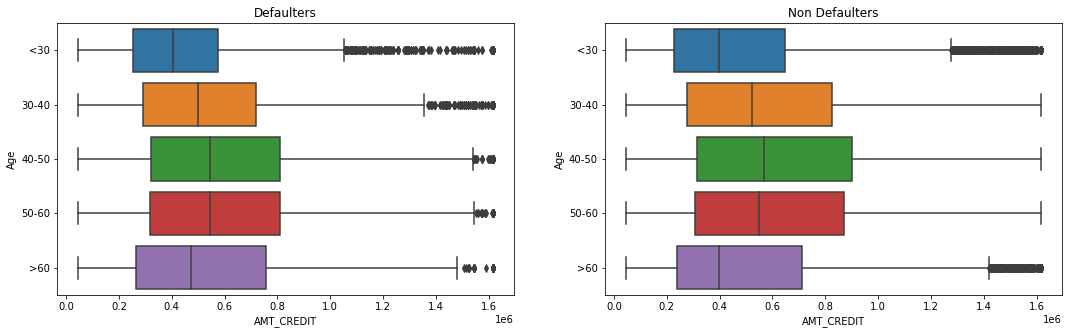

In [158]:
#AGE vs CREDIT
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
plt.title('Defaulters')
sns.boxplot(appdata_1.AMT_CREDIT,appdata_1.Age)

plt.subplot(1,2,2)
plt.title('Non Defaulters')
sns.boxplot(appdata_0.AMT_CREDIT,appdata_0.Age)

plt.show()

The boxplot indicates the following:
1. In defaulters maximum credit has been taken by people in age group 40-50 and 50-60 followed by people of age more than 60 yrs and then between 30-40 years
2. In defaulters people of age less than 30 years have low credit amount with them.
2. In non defaulters category it is evident that the middle aged people i.e in age group of 40-50 years tend to take more loans followed by old people who are 50 and above then followed by young adults in age of 30-40 years.

From the non defaulters data it can be recommended that people who are less than 30 years take less credit amount and also return the amount as well, so they are trustworthy, also the people of age more than 60 can be trusted by banks in providing loans as they are non defaulters as well. Generally old people have good amount of savings to payback the loans.

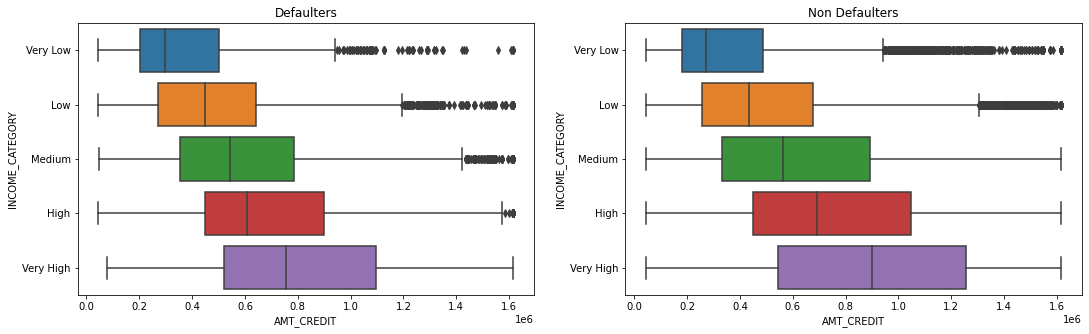

In [159]:
#income category vs Credit

plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
plt.title('Defaulters')
sns.boxplot(appdata_1.AMT_CREDIT,appdata_1.INCOME_CATEGORY)

plt.subplot(1,2,2)
plt.title('Non Defaulters')
sns.boxplot(appdata_0.AMT_CREDIT,appdata_0.INCOME_CATEGORY)

plt.show()

The insights from the above graph indicate the following:
1. People who are defaulters with high very high income have more credit amount and the people with low income have low credit.This also indicated that the way the income of defaulters increase so is the increase in the credit amount provided to them. This is quite evident from the median in the defaulter's graph.
2. On the other hand, the same trend is seen in non defaulters as well. But the difference is that, the non defaulters with high and very high income have been given more credit (amount as high as 13 lakhs) as compared to the people in high and very high-income group who fall in defaulters category who get around 11 lakhs.

From pt 2 above it is evident that bank has developed trust on certain people as they are non defaulters and are awarded more credit. Where as the same trust is not for the defaulters in the same income category.


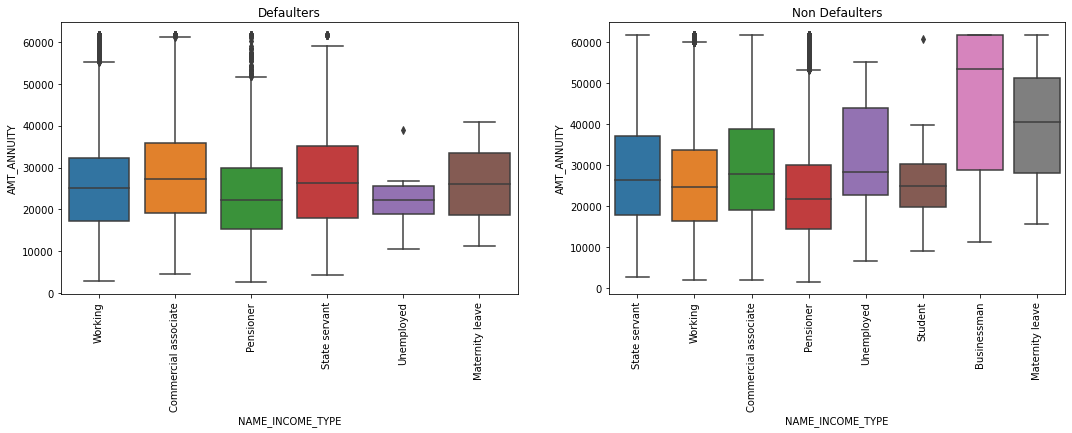

In [160]:
#Annuity vs Income Type

plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
plt.title('Defaulters')
sns.boxplot(appdata_1.NAME_INCOME_TYPE,appdata_1.AMT_ANNUITY)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title('Non Defaulters')
sns.boxplot(appdata_0.NAME_INCOME_TYPE,appdata_0.AMT_ANNUITY)
plt.xticks(rotation=90)

plt.show()

Following are the insights:
1. The people who are defaulters, it has been observed that
    - Commercial associates and state servants that have a similar Annuity amount. The same is the case for the people who are on maternity leave as well. These 3 categories: commercial associates, State servants and those on maternity leave have high annuity assets of value around 35000, a median of 25000 and lower quartile value at around 20000.
    - Also, the unemployed people are the ones who have least annuity amount though the median value is somewhere between 20000 to 25000. 
    - Pensioners being the old people in the income category definitely have more annuity as compared to unemployed people and they share the same median as the unemployed people in the defaulters category.
    - The working people fall in the middle bracket . They have annuity a little above 30000 and median value slightly above the median for pensioners and unemployed. So, these are better off category of people.
The defaulters analysis of Annuity and Income type show us that the Commercial associates, State Servants and people on Maternity leave have high annuity amounts, followed by the working class, pensioners and unemployed respectively
2. People who are non defaulters, it has been observed that
    - Firstly, the businessman are the ones who lead in having high Annuity amount and are non defaulters as well as per the data.
    - The median value for commercial servants and unemployed non defaulters is at the same value of approx 28500. But interestingly the unemployed who are non defaulters have more annuity with them of amount around 45000. This means these unemployed non defaulters have good savings and good investments as compared to the commercial servants
    - On the same lines as above point, it is evident that the working class people and students also have same median annuity value, but working people have more annuity amount as compared to students. This can be for obvious reasons that students have only source of income as pocket money or could be internship which is way less than the income of a working class person. So the non defaulter working people have more annuity value.
    - Non defaulter State servants also enjoy a good annuity amount followed by the least in the category which are the pensioners
    - Interesting to note that maternity leave non defaulters have high annuity amounts.
From the above analysis we can say that the annuity and income type relation between defaulters and non defaulters independently has its own variations. eg Observing the defaulters and non defaulters under each income type they have similar annuity amounts.
eg Observing the defaulters and non defaulters under each income type they have similar annuity amounts.


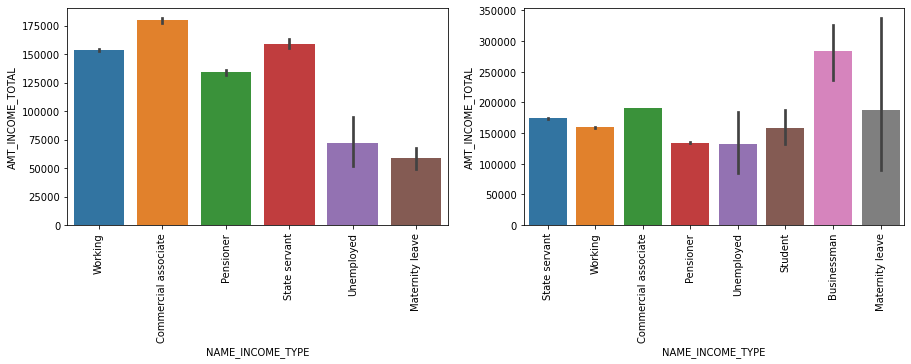

In [161]:
#income type and income
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.barplot(appdata_1.NAME_INCOME_TYPE,appdata_1.AMT_INCOME_TOTAL)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(appdata_0.NAME_INCOME_TYPE,appdata.AMT_INCOME_TOTAL)
plt.xticks(rotation=90)

plt.show()

Follwoing are the insights:
1. Among the defaulters it is evident that the income bracket for Commercial associates is highest followed by state servants,working class, pensioners and unemployed category
2. Among the non defaulters it is evident that the maximum income bracket is that of the businessman, followed by people on maternity leave,commercial associates, state servants, working class,student,unemployed, and pensioners

Form the above analysis another interesting insight is that the defaulters do not have businessman and students, and it is also seen that these are non defaulters. So businessman and students can be trusted by banks for giving loans.

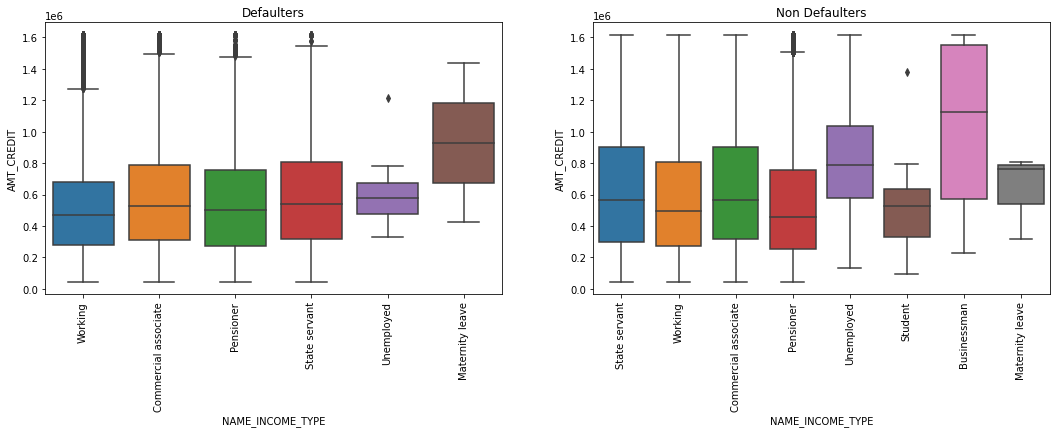

In [162]:
#Credit and Income type
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
plt.title('Defaulters')
sns.boxplot(appdata_1.NAME_INCOME_TYPE,appdata_1.AMT_CREDIT)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title('Non Defaulters')
sns.boxplot(appdata_0.NAME_INCOME_TYPE,appdata_0.AMT_CREDIT)
plt.xticks(rotation=90)

plt.show()


Observations:
1. People who are defaulters:
    - Under defaulters it has been seen that people take more loans i.e. have more credit amount who are on maternity leave
    - On the other hand commercial associates and state servants have credit values.
    - The working people have low credit amount under defaulters category
    - Pensioners also have loans amounts in the same caegory as commercial associates and state servants
The main reasons behind these can be interpreted as, people who plan a children and go on maternity leave, take more credit as the process involves a lot of finance. 
Also the amount of loan taken by Commercial associates, state servants or working class people are of lesser amount which is between 3lakhs to 7 lakhs approximately.

2. People who are non defaulters:
    - Under non defaulters the businessman are the ones who have high credit amounts in their kitty
    - Business people are followed by unemployed people, who need loans for their living, but they are also non defaulters. They pay their loan.
    - Just like defaulters state servants and commercial associates have same credit pattern followed by the working people
    - However, unlike pensioners in defaulters, the non defaulter pensioners take less credit.
The buisnessmen require more credit to run their business so they have high loan amounts.The unemployed people need loan to meet their ends, so they take loans.Pensioners take less credit as they have their own savings already, but to meet certain uncertainities they make take some loan, so their credit amount is less.

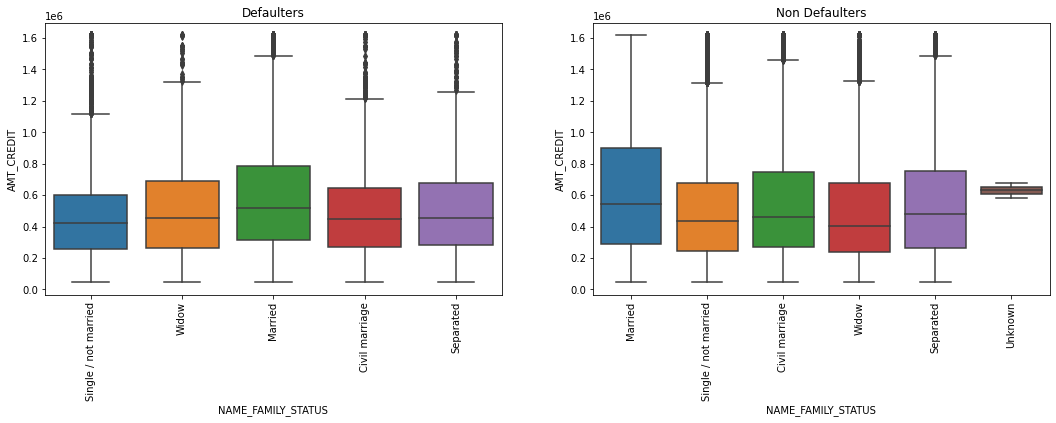

In [163]:
# CREDIT vs FAMILY STATUS

plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
plt.title('Defaulters')
sns.boxplot(appdata_1.NAME_FAMILY_STATUS,appdata_1.AMT_CREDIT)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title('Non Defaulters')
sns.boxplot(appdata_0.NAME_FAMILY_STATUS,appdata_0.AMT_CREDIT)
plt.xticks(rotation=90)

plt.show()

Observations:
1. Defaulters:
    - The boxplot indicates that married people are the ones who take more credit and are defaulters as well
    - The median value for the defaulter widows and the separated category have same loan amounts in their kitty
    - People who are single or have done civil marriage in the defaulters category are the ones who have low credit amounts ranging between 3lakhs to 6 lakhs. These category of people also have the median at the same credit amount.
2. Non Defaulters:
    - In Non defaulters it has been seen that married people have maximum credit amount with them 
    - Those who have done civil marriage or are separated are the ones who have same credit amounts taken and they have median values also same.
    - Similarly single and widow category in family status have same credit maounts taken ranging between 3 lakhs to a little higher than 6 lakhs.
    

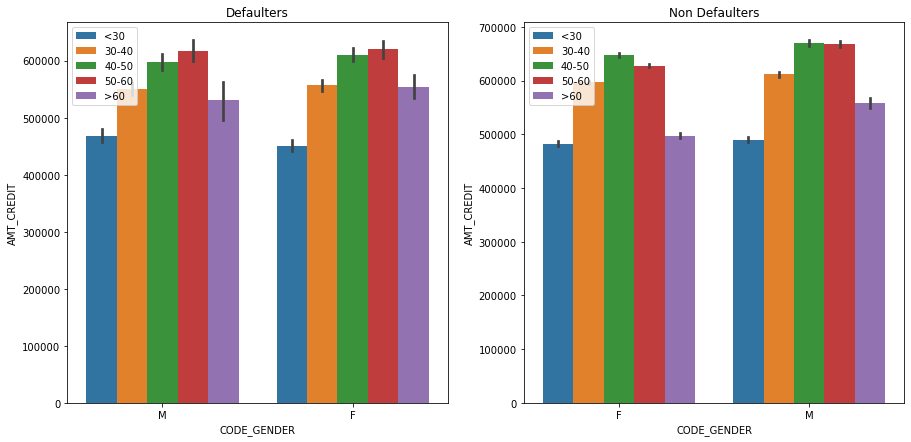

In [164]:
#Gender, Age Category, Credit
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title('Defaulters')
sns.barplot(x=appdata_1.CODE_GENDER,y=appdata_1.AMT_CREDIT,hue=appdata_1.Age)
plt.legend(loc='upper left')

plt.subplot(1,2,2)
plt.title('Non Defaulters')
sns.barplot(x=appdata_0.CODE_GENDER,y=appdata_0.AMT_CREDIT,hue=appdata_0.Age)

plt.legend(loc='upper left')


Insights are as follows:
1. In defaulters category it is quite evident that male aged between 50-60 and 40-50 take more credit amounts and are defaulters as well. In females also, age groups of 50-60 and 40-50 take more credit followed by the old aged (>60) and young adult (30-40) category. The most safe bet for bank to provide loans can be Young adult male and females as there are less defaulters in this category but with thorough checks and background scrutiny
2. In non defaulters maximum loan is with middle aged (40-50) male and female followed by old aged and young adults.

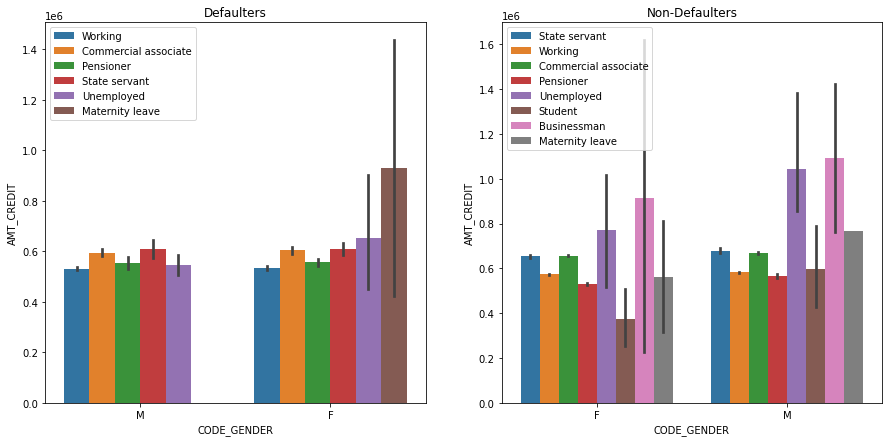

In [165]:
#Gender, Income Type, Credit
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title('Defaulters')
sns.barplot(x=appdata_1.CODE_GENDER,y=appdata_1.AMT_CREDIT,hue=appdata_1.NAME_INCOME_TYPE)
plt.legend(loc='upper left')

plt.subplot(1,2,2)
plt.title('Non-Defaulters')
sns.barplot(x=appdata_0.CODE_GENDER,y=appdata_0.AMT_CREDIT,hue=appdata_0.NAME_INCOME_TYPE)
plt.legend(loc='upper left')


Observations:
1. Defaulters:
    - The females on maternity leave tend to take higher credit and are the major defaulters as well. 
    - Whereas defaulter males it is seen that the ones whose income source is sate or are working as state servants and those who are commercial associates take loan of high amount. 
So in defaulters category, banks should be careful while giving loan to pregnant women.

2. Non Defaulters:
    - From the plot it is evident that the businessmen whether male or female are the ones who take more loans and are also non defaulters. So these are the safe bet for banks to provide loan to.

Also an important thing to note is that businessman and student category are not in defaulters category.

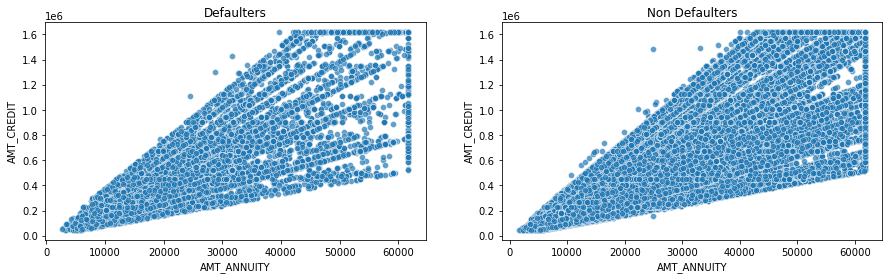

In [166]:
#Annuity vs Credit

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title('Defaulters')
sns.scatterplot(appdata_1.AMT_ANNUITY,appdata_1.AMT_CREDIT,alpha=0.7)
plt.subplot(1,2,2)
plt.title('Non Defaulters')
sns.scatterplot(appdata_0.AMT_ANNUITY,appdata_0.AMT_CREDIT,alpha=0.7)

plt.show()

In [167]:
print ("Correlation b/w Annuity and Credit for defaulters",appdata_1.AMT_ANNUITY.corr(appdata_1.AMT_CREDIT))
print ("Correlation b/w Annuity and Credit for non defaulters",appdata_0.AMT_ANNUITY.corr(appdata_0.AMT_CREDIT))

Correlation b/w Annuity and Credit for defaulters 0.7601234136216823
Correlation b/w Annuity and Credit for non defaulters 0.7948078743243163


The scatterplots between Annuity and Credit indicate that they have positive correlation and have linear correlation between the two variables. A person with more Annuity assets has better chance to get higher credits and vice versa

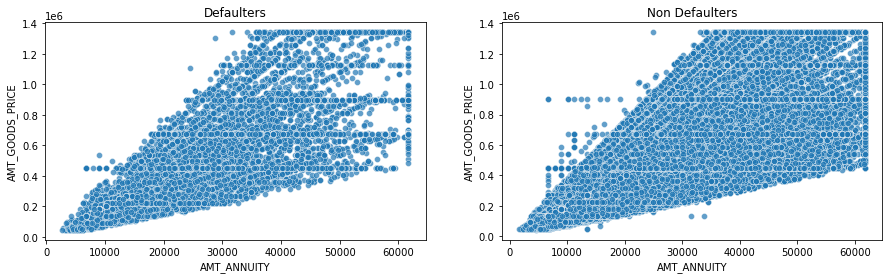

In [168]:
#Annuity vs Goods Price

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title('Defaulters')
sns.scatterplot(appdata_1.AMT_ANNUITY,appdata_1.AMT_GOODS_PRICE,alpha=0.7)
plt.subplot(1,2,2)
plt.title('Non Defaulters')
sns.scatterplot(appdata_0.AMT_ANNUITY,appdata_0.AMT_GOODS_PRICE,alpha=0.7)

plt.show()

In [169]:
print ("Correlation b/w Annuity and Goods Price for defaulters",appdata_1.AMT_ANNUITY.corr(appdata_1.AMT_GOODS_PRICE))
print ("Correlation b/w Annuity and Goods Price for non defaulters",appdata_0.AMT_ANNUITY.corr(appdata_0.AMT_GOODS_PRICE))

Correlation b/w Annuity and Goods Price for defaulters 0.7602866472620408
Correlation b/w Annuity and Goods Price for non defaulters 0.7973154338305387


The scatterplots between Annuity and Good Price indicate that they have positive correlation and also some linear correlation is also seen between the two variables. But one is not the cause for other. That is there is no causation. Increase in goods price does not increase the Annuity, even though there is strong correlation between them.

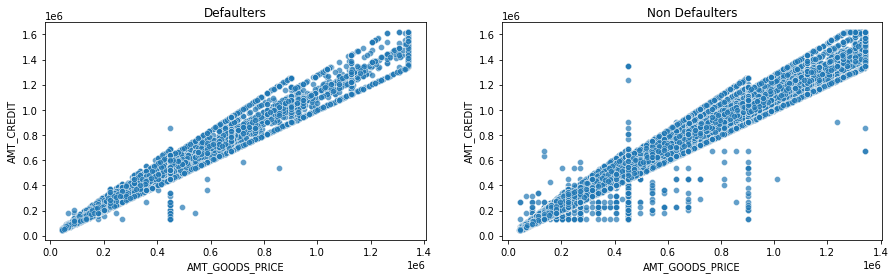

In [170]:
#Goods Price vs Credit
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title('Defaulters')
sns.scatterplot(appdata_1.AMT_GOODS_PRICE,appdata_1.AMT_CREDIT,alpha=0.7)
plt.subplot(1,2,2)
plt.title('Non Defaulters')
sns.scatterplot(appdata_0.AMT_GOODS_PRICE,appdata_0.AMT_CREDIT,alpha=0.7)

plt.show()

In [171]:
print ("Correlation b/w Goods Price and Credit for defaulters",appdata_1.AMT_GOODS_PRICE.corr(appdata_1.AMT_CREDIT))
print ("Correlation b/w Goods Price and Credit for non defaulters",appdata_0.AMT_GOODS_PRICE.corr(appdata_0.AMT_CREDIT))

Correlation b/w Goods Price and Credit for defaulters 0.9818366038380508
Correlation b/w Goods Price and Credit for non defaulters 0.9855821500980402


There is very high correlation between Goods Price and Credit for defaulters. In Non defaulters also the correlation is positive and linear but some outliers are also there. The correlation of 98% is quite high for the two variables. So overall we can say that as the goods price increase the credit amount also increases.

In [172]:
#sns.pairplot(data=appdata_1,vars=['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','AMT_ANNUITY'])


In [173]:
#sns.pairplot(data=appdata_0,vars=['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','AMT_ANNUITY'])

## STEP 5 MULTIVARIATE ANALYSIS

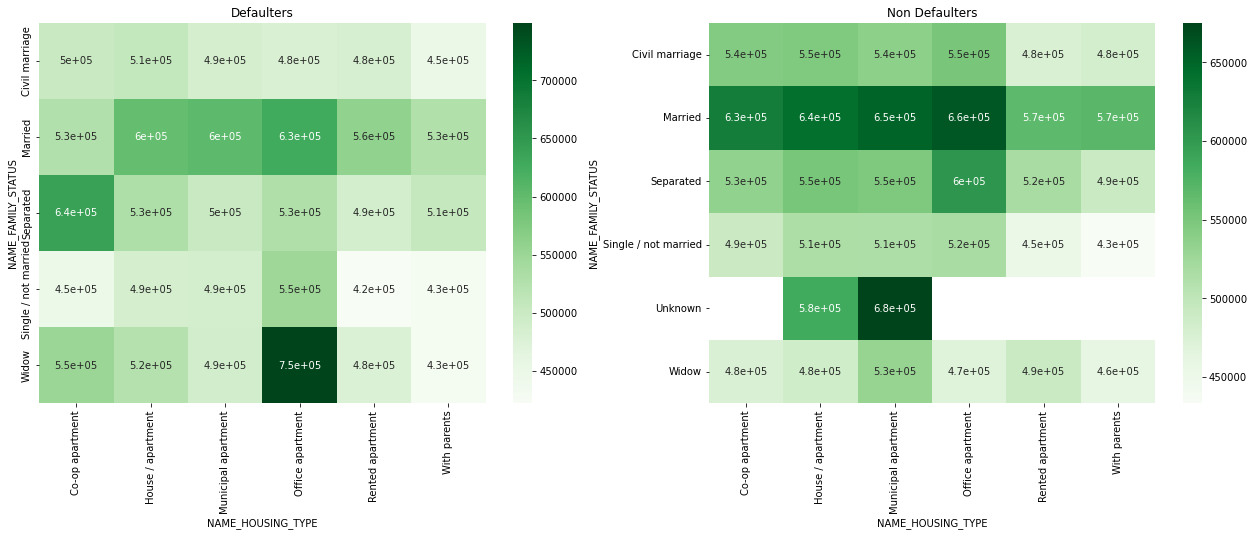

In [174]:
#Housing Type vs Family Status vs Crdit amount
df=pd.pivot_table(index='NAME_FAMILY_STATUS',columns='NAME_HOUSING_TYPE',values='AMT_CREDIT',data=appdata_1,aggfunc='mean')
df0=pd.pivot_table(index='NAME_FAMILY_STATUS',columns='NAME_HOUSING_TYPE',values='AMT_CREDIT',data=appdata_0,aggfunc='mean')

plt.figure(figsize=(22,7))
plt.subplot(1,2,1)
plt.title('Defaulters')
sns.heatmap(df,cmap='Greens',annot=True)


plt.subplot(1,2,2)
plt.title('Non Defaulters')
sns.heatmap(df0,cmap='Greens',annot=True)


plt.show()

1. Defaulters:
    - The heatmap for defaulters indicate that widows and office apartment housing type has a vey strong correlation, followed by separated and Co-op apartment. 
    - One more thing to be observed is that married people have a positive correlation with all the housing types and also a strong relation we can say by the colour of the boxes.
2. Non defaulters:
    - The strongest correlation exists between married people and Office Apartment.
    - In fact married people have strong correlation with all the housing types
    

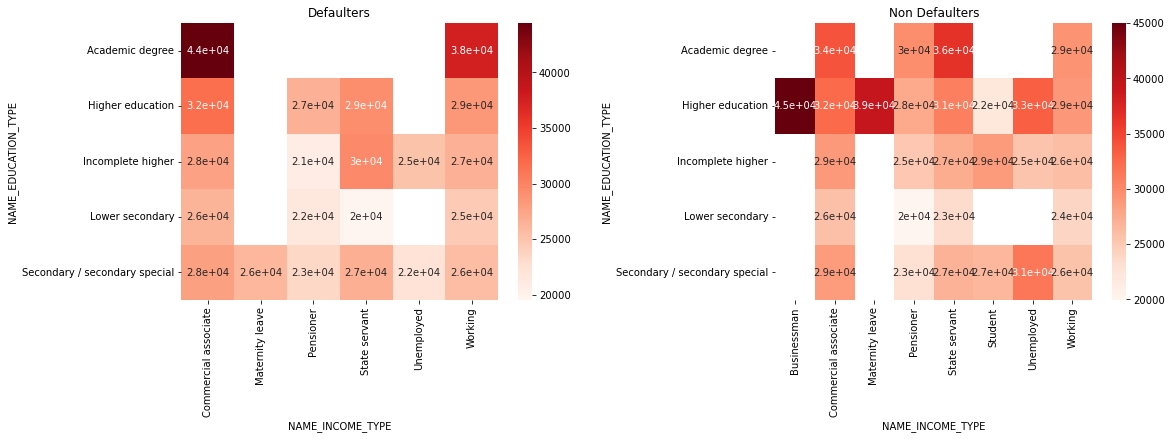

In [175]:
#Education vs Income Type vs Annuity

df1=pd.pivot_table(index='NAME_EDUCATION_TYPE',columns='NAME_INCOME_TYPE',values='AMT_ANNUITY',data=appdata_1,aggfunc='mean')
df_1=pd.pivot_table(index='NAME_EDUCATION_TYPE',columns='NAME_INCOME_TYPE',values='AMT_ANNUITY',data=appdata_0,aggfunc='mean')

plt.figure(figsize=(25,7))
plt.subplot(1,2,1)
plt.title('Defaulters')
sns.heatmap(df1,cmap='Reds',annot=True)


plt.subplot(1,2,2)
plt.title('Non Defaulters')
sns.heatmap(df_1,cmap='Reds',annot=True)

plt.subplots_adjust(left=0.05,
                    bottom=0.05, 
                    right=0.6, 
                    top=0.6, 
                    wspace=0.5, 
                    hspace=1.0)
plt.show()

1. Defaulters:

    - The heatmap shows that the relation between academic degree and commercial associate is highly correlated whereas the lower sec is least correlated with any of the Income types 
2. Non Defaulters:
    - We can depict from the graph that the higher education is the favourably corelated with Businessman 

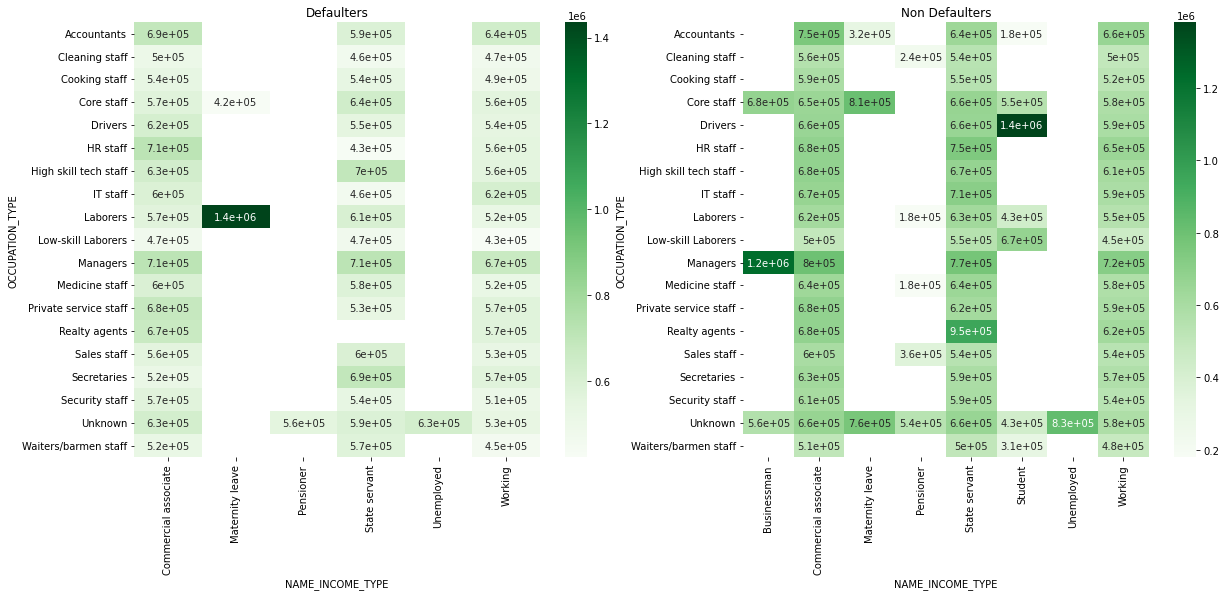

In [176]:
df2=pd.pivot_table(index='OCCUPATION_TYPE',columns='NAME_INCOME_TYPE',values='AMT_CREDIT',data=appdata_1,aggfunc='mean')
df3=pd.pivot_table(index='OCCUPATION_TYPE',columns='NAME_INCOME_TYPE',values='AMT_CREDIT',data=appdata_0,aggfunc='mean')

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('Defaulters')
sns.heatmap(df2,cmap='Greens',annot=True)

plt.subplot(1,2,2)
plt.title('Non Defaulters')
sns.heatmap(df3,cmap='Greens',annot=True)

plt.show()

1. Defaulters:
    - It is seen that labourers have string correlation with maternity leave income type. 
2. Non Defaulters:
    - In Non defaulters high correlation is seen between Occupation Type of Drivers and Income Type Students followed by Managers and Commercial Associates

# Previous Application Data

In [177]:
# loading the previous application data file

prevdata=pd.read_csv('/Users/avinseth/Desktop/Data Toolkit/Mod 7 Credit EDA Assignment/Credit EDA Case Study/previous_application.csv',header=0)

In [178]:
# read the file
prevdata.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


## Checking data set info

In [179]:
#data info
prevdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

## Checking mathematical parameters of dataset

In [180]:
# mathematical info on data
prevdata.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


## Checking datatypes of each column

In [181]:
prevdata.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

In [182]:
prevdata.shape

(1670214, 37)

## STEP 1: Identify the Missing Values and Rectify them

In [183]:
# calculate the percentage of missing values in the entire dataset
# find columns with missing values that are greater than 45%

na_percent=prevdata.isna().mean()   #variable na_percent has shows the percentage of missing values in entire dataset
na_percent

SK_ID_PREV                     0.000000e+00
SK_ID_CURR                     0.000000e+00
NAME_CONTRACT_TYPE             0.000000e+00
AMT_ANNUITY                    2.228667e-01
AMT_APPLICATION                0.000000e+00
AMT_CREDIT                     5.987257e-07
AMT_DOWN_PAYMENT               5.363648e-01
AMT_GOODS_PRICE                2.308177e-01
WEEKDAY_APPR_PROCESS_START     0.000000e+00
HOUR_APPR_PROCESS_START        0.000000e+00
FLAG_LAST_APPL_PER_CONTRACT    0.000000e+00
NFLAG_LAST_APPL_IN_DAY         0.000000e+00
RATE_DOWN_PAYMENT              5.363648e-01
RATE_INTEREST_PRIMARY          9.964370e-01
RATE_INTEREST_PRIVILEGED       9.964370e-01
NAME_CASH_LOAN_PURPOSE         0.000000e+00
NAME_CONTRACT_STATUS           0.000000e+00
DAYS_DECISION                  0.000000e+00
NAME_PAYMENT_TYPE              0.000000e+00
CODE_REJECT_REASON             0.000000e+00
NAME_TYPE_SUITE                4.911975e-01
NAME_CLIENT_TYPE               0.000000e+00
NAME_GOODS_CATEGORY            0

In [184]:
# filtering the columns which have missing values >45% and taking the names of these columns in a list

na_percent=list(na_percent[na_percent>0.45].index)
len(na_percent)
na_percent

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE']

In [185]:
# number of columns with missing values greater than 45%
len(na_percent)

5

In [186]:
# Dropping 5 columns with null values >45%
# These 5 columns have missing values greater than 45% which means this data is inconsitent and would create inconsitency in analysis. So we are dropping these 49 columns
prevdata.drop(labels=na_percent,axis=1,inplace=True)

In [187]:
prevdata.shape

(1670214, 32)

## Data Correction
1. Imputing Missing values
2. Correcting Data types if any
3. Rectifying the negative values

In [188]:
prevdata.isna().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                    372235
AMT_APPLICATION                     0
AMT_CREDIT                          1
AMT_GOODS_PRICE                385515
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
NAME_SELLER_INDUSTRY                0
CNT_PAYMENT                    372230
NAME_YIELD_GROUP                    0
PRODUCT_COMBINATION               346
DAYS_FIRST_D

In [189]:
# imputing annuity column with median as outliers are least affected by median
prevdata.AMT_ANNUITY.fillna(prevdata.AMT_ANNUITY.median(),inplace=True)

In [190]:
# imputing Goods Price column with median as outliers are least affected by median
prevdata.AMT_GOODS_PRICE.fillna(prevdata.AMT_GOODS_PRICE.median(),inplace=True)

In [191]:
# imputing CNT_PAYMENT column with median as outliers are least affected by median
prevdata.CNT_PAYMENT.fillna(prevdata.CNT_PAYMENT.median(),inplace=True)

In [192]:
#imputing amt credit column with median as outliers are least affected by median
prevdata.AMT_CREDIT.fillna(prevdata.AMT_CREDIT.median(),inplace=True)

In [193]:
#PRODUCT COMBINATION
prevdata.PRODUCT_COMBINATION.unique()

array(['POS mobile with interest', 'Cash X-Sell: low',
       'Cash X-Sell: high', 'Cash X-Sell: middle', 'Cash Street: high',
       'Cash', 'POS household without interest',
       'POS household with interest', 'POS other with interest',
       'Card X-Sell', 'POS mobile without interest', 'Card Street',
       'POS industry with interest', 'Cash Street: low',
       'POS industry without interest', 'Cash Street: middle',
       'POS others without interest', nan], dtype=object)

In [194]:
# replacing nan values in Product Combination column as Unknown category
prevdata.PRODUCT_COMBINATION.replace(np.nan,'Unknown',inplace=True)

In [195]:
prevdata.PRODUCT_COMBINATION.value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Unknown                              346
Name: PRODUCT_COMBINATION, dtype: int64

In [196]:
# days first drawing
prevdata.DAYS_FIRST_DRAWING.unique()

array([ 3.65243e+05,          nan, -2.77000e+02, ..., -1.61100e+03,
       -1.77000e+03, -1.87900e+03])

In [197]:
prevdata.DAYS_FIRST_DRAWING.isna().sum()


673065

In [198]:
# as days need to be positive so converting days into positive using abs function
prevdata.DAYS_FIRST_DRAWING=abs(prevdata.DAYS_FIRST_DRAWING)

In [199]:
# coverting all the days values from negative to positive
prevdata.DAYS_DECISION=abs(prevdata.DAYS_DECISION)
prevdata.DAYS_FIRST_DUE=abs(prevdata.DAYS_FIRST_DUE)
prevdata.DAYS_LAST_DUE=abs(prevdata.DAYS_LAST_DUE)
prevdata.DAYS_LAST_DUE_1ST_VERSION=abs(prevdata.DAYS_LAST_DUE_1ST_VERSION)
prevdata.DAYS_TERMINATION=abs(prevdata.DAYS_TERMINATION)

In [200]:
prevdata.DAYS_FIRST_DUE.unique()

array([  42.,  134.,  271., ..., 2842., 1774., 2892.])

In [201]:
# converting area from negaitive to positive

prevdata.SELLERPLACE_AREA.unique()

array([  35,   -1,  200, ..., 2233,  887, 2420])

In [202]:
prevdata.SELLERPLACE_AREA=abs(prevdata.SELLERPLACE_AREA)

In [203]:
#NFLAG_INSURED_ON_APPROVAL

prevdata.NFLAG_INSURED_ON_APPROVAL.isna().sum()

673065

In [204]:
prevdata.NFLAG_INSURED_ON_APPROVAL.unique()

array([ 0.,  1., nan])

In [205]:
prevdata.NFLAG_INSURED_ON_APPROVAL.value_counts()

0.0    665527
1.0    331622
Name: NFLAG_INSURED_ON_APPROVAL, dtype: int64

In [206]:
x=prevdata.NFLAG_INSURED_ON_APPROVAL.mode()
x

0    0.0
dtype: float64

In [207]:
# replacing the nan values in NFLAG_INSURED_ON_APPROVAL with Mode
prevdata.NFLAG_INSURED_ON_APPROVAL.fillna(0,inplace=True)

In [208]:
prevdata.isna().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                         0
AMT_APPLICATION                     0
AMT_CREDIT                          0
AMT_GOODS_PRICE                     0
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
NAME_SELLER_INDUSTRY                0
CNT_PAYMENT                         0
NAME_YIELD_GROUP                    0
PRODUCT_COMBINATION                 0
DAYS_FIRST_D

In [209]:
# converting area from negaitive to positive
prevdata.SELLERPLACE_AREA.unique()

array([  35,    1,  200, ..., 2233,  887, 2420])

In [210]:
#checking values for WEEKDAY_APPR_PROCESS_START
prevdata.WEEKDAY_APPR_PROCESS_START.unique()

array(['SATURDAY', 'THURSDAY', 'TUESDAY', 'MONDAY', 'FRIDAY', 'SUNDAY',
       'WEDNESDAY'], dtype=object)

In [211]:
# checking values for HOUR_APPR_PROCESS_START
prevdata.HOUR_APPR_PROCESS_START.unique()

array([15, 11,  7,  9,  8, 10, 12, 13, 14, 16,  6,  4,  5, 19, 17, 18, 20,
       22, 21,  3,  1,  2, 23,  0])

In [212]:
# checking values for FLAG_LAST_APPL_PER_CONTRACT
prevdata.FLAG_LAST_APPL_PER_CONTRACT.unique()

array(['Y', 'N'], dtype=object)

In [213]:
# checking values for NFLAG_LAST_APPL_IN_DAY
prevdata.NFLAG_LAST_APPL_IN_DAY.unique()

array([1, 0])

In [214]:
# checking values for NAME_CASH_LOAN_PURPOSE
prevdata.NAME_CASH_LOAN_PURPOSE.unique()

array(['XAP', 'XNA', 'Repairs', 'Everyday expenses', 'Car repairs',
       'Building a house or an annex', 'Other', 'Journey',
       'Purchase of electronic equipment', 'Medicine',
       'Payments on other loans', 'Urgent needs', 'Buying a used car',
       'Buying a new car', 'Buying a holiday home / land', 'Education',
       'Buying a home', 'Furniture', 'Buying a garage',
       'Business development', 'Wedding / gift / holiday', 'Hobby',
       'Gasification / water supply', 'Refusal to name the goal',
       'Money for a third person'], dtype=object)

In [215]:
# creating a category Unknown for XNA and XAP
prevdata.NAME_CASH_LOAN_PURPOSE.replace(['XNA','XAP'],'Unknown',inplace=True)

In [216]:
prevdata.NAME_CASH_LOAN_PURPOSE.value_counts()

Unknown                             1600579
Repairs                               23765
Other                                 15608
Urgent needs                           8412
Buying a used car                      2888
Building a house or an annex           2693
Everyday expenses                      2416
Medicine                               2174
Payments on other loans                1931
Education                              1573
Journey                                1239
Purchase of electronic equipment       1061
Buying a new car                       1012
Wedding / gift / holiday                962
Buying a home                           865
Car repairs                             797
Furniture                               749
Buying a holiday home / land            533
Business development                    426
Gasification / water supply             300
Buying a garage                         136
Hobby                                    55
Money for a third person        

In [217]:
#NAME_CLIENT_TYPE creating a category Unknown for XNA 
prevdata.NAME_CLIENT_TYPE.replace('XNA','Unknown',inplace=True)

In [218]:
prevdata.NAME_CLIENT_TYPE.unique()

array(['Repeater', 'New', 'Refreshed', 'Unknown'], dtype=object)

In [219]:
#NAME CONTRACT STATUS
prevdata.NAME_CONTRACT_STATUS.value_counts()

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

The previous data indicates that we have following loan approvals, rejections, cancellations and unsued offers:
1. Approved        1036781
2. Canceled         316319
3. Refused          290678
4. Unused offer      26436

## Anslying the application_data.csv with previous_data.csv 

### Merging the two data frames

In [220]:
mergedata=appdata.merge(prevdata, on='SK_ID_CURR',how='left',suffixes=("_current","_previous"))

In [221]:
mergedata.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_current,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_current,AMT_ANNUITY_current,AMT_GOODS_PRICE_current,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,EXT_SOURCE_2,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_DAY,Age,INCOME_CATEGORY,CREDIT_CATEGORY,SK_ID_PREV,NAME_CONTRACT_TYPE_previous,AMT_ANNUITY_previous,AMT_APPLICATION,AMT_CREDIT_previous,AMT_GOODS_PRICE_previous,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,9461,9461,9461,1,Laborers,1,0,0,0,Business Entity Type 3,0.262949,9461,0.0,<30,Medium,Low,1038818.0,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9.0,Y,1.0,Unknown,Approved,606.0,XNA,XAP,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest,365243.0,565.0,125.0,25.0,17.0,0.0
1,100003,0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,16765,16765,16765,16765,1,Core staff,2,0,0,0,School,0.622246,16765,0.0,40-50,High,High,1810518.0,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12.0,Y,1.0,Unknown,Approved,746.0,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,1.0,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,716.0,386.0,536.0,527.0,1.0
2,100003,0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,16765,16765,16765,16765,1,Core staff,2,0,0,0,School,0.622246,16765,0.0,40-50,High,High,2636178.0,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17.0,Y,1.0,Unknown,Approved,828.0,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400.0,Furniture,6.0,middle,POS industry with interest,365243.0,797.0,647.0,647.0,639.0,0.0
3,100003,0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,16765,16765,16765,16765,1,Core staff,2,0,0,0,School,0.622246,16765,0.0,40-50,High,High,2396755.0,Consumer loans,6737.310,68809.5,68053.5,68809.5,SATURDAY,15.0,Y,1.0,Unknown,Approved,2341.0,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200.0,Consumer electronics,12.0,middle,POS household with interest,365243.0,2310.0,1980.0,1980.0,1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0.0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,19046,19046,19046,1,Laborers,1,0,0,0,Government,0.555912,19046,0.0,50-60,Very Low,Very Low,1564014.0,Consumer loans,5357.250,24282.0,20106.0,24282.0,FRIDAY,5.0,Y,1.0,Unknown,Approved,815.0,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,30.0,Connectivity,4.0,middle,POS mobile without interest,365243.0,784.0,694.0,724.0,714.0,0.0


Merged the two dataframes using left join, as we want all the analysis for the current data, so left join will fetch all the data form the appdata dataframe.So now in mergedata we have all the previous data for the applicatants.

## Outliers

<AxesSubplot:xlabel='AMT_GOODS_PRICE_previous'>

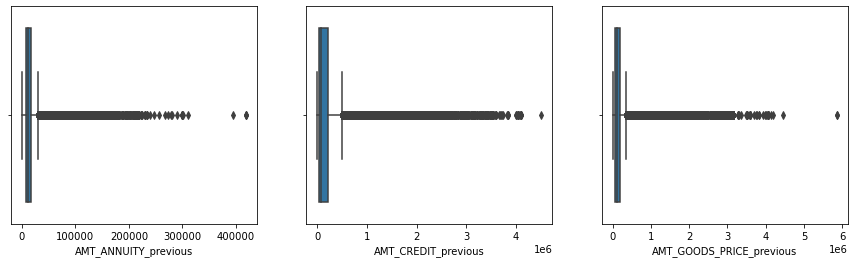

In [222]:
#AMT_ANNUITY_previous
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.boxplot(mergedata.AMT_ANNUITY_previous)

plt.subplot(1,3,2)
sns.boxplot(mergedata.AMT_CREDIT_previous)

plt.subplot(1,3,3)
sns.boxplot(mergedata.AMT_GOODS_PRICE_previous)

Treatment of Outliers

In [223]:
Q3=mergedata.AMT_ANNUITY_previous.quantile(0.75)
Q1=mergedata.AMT_ANNUITY_previous.quantile(0.25)
IQR=Q3-Q1
upperbound=Q3+1.5*IQR
lowerbound=Q1-1.5*IQR
print (IQR,upperbound,lowerbound)

9341.91 30760.83 -6606.8099999999995


In [224]:
mergedata.AMT_ANNUITY_previous=np.where(mergedata.AMT_ANNUITY_previous>upperbound,upperbound,mergedata.AMT_ANNUITY_previous)

In [225]:
Q3=mergedata.AMT_CREDIT_previous.quantile(0.75)
Q1=mergedata.AMT_CREDIT_previous.quantile(0.25)
IQR=Q3-Q1
upperbound=Q3+1.5*IQR
lowerbound=Q1-1.5*IQR
print (IQR,upperbound,lowerbound)

190759.5 501779.25 -261258.75


In [226]:
mergedata.AMT_CREDIT_previous=np.where(mergedata.AMT_CREDIT_previous>upperbound,upperbound,mergedata.AMT_CREDIT_previous)

In [227]:
Q3=mergedata.AMT_GOODS_PRICE_previous.quantile(0.75)
Q1=mergedata.AMT_GOODS_PRICE_previous.quantile(0.25)
IQR=Q3-Q1
upperbound=Q3+1.5*IQR
lowerbound=Q1-1.5*IQR
print (IQR,upperbound,lowerbound)

113625.0 350437.5 -104062.5


In [228]:
mergedata.AMT_GOODS_PRICE_previous=np.where(mergedata.AMT_GOODS_PRICE_previous>upperbound,upperbound,mergedata.AMT_GOODS_PRICE_previous)

<AxesSubplot:xlabel='AMT_GOODS_PRICE_previous'>

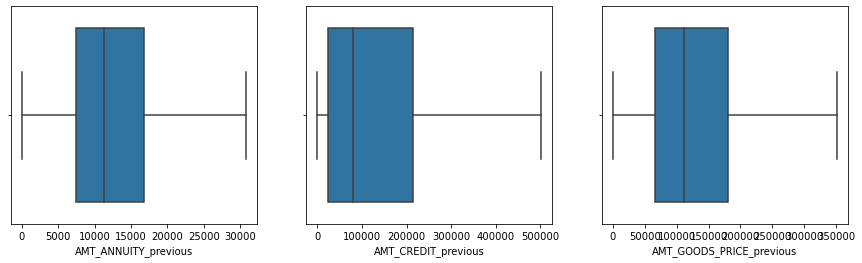

In [229]:
# After treating the outliers
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.boxplot(mergedata.AMT_ANNUITY_previous)

plt.subplot(1,3,2)
sns.boxplot(mergedata.AMT_CREDIT_previous)

plt.subplot(1,3,3)
sns.boxplot(mergedata.AMT_GOODS_PRICE_previous)

## Analysis

<AxesSubplot:xlabel='NAME_CONTRACT_TYPE_previous', ylabel='count'>

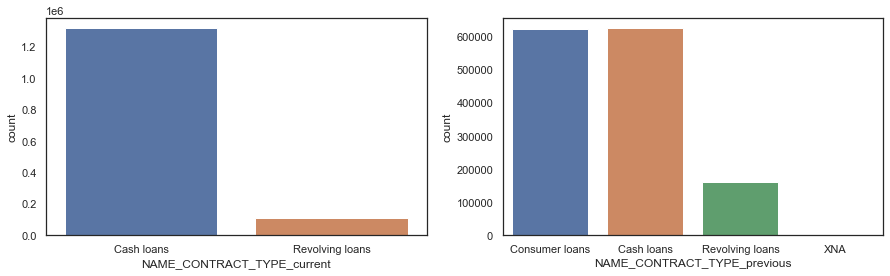

In [230]:
sns.set(style='white')
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.countplot(mergedata.NAME_CONTRACT_TYPE_current)

plt.subplot(1,2,2)
sns.countplot(mergedata.NAME_CONTRACT_TYPE_previous)

Observation:
1. The plots indicate that the previous data base has three type of loans: Cash Loans, Revolving Loans and Consumer Loans. But in current application data set, there are only cash loans and revolving loans.

2. The data also indicates that in current applications there are more cash loans that are being provided to the people and in previous data there are more consumer loans that are provided to the people


<AxesSubplot:xlabel='NAME_YIELD_GROUP', ylabel='count'>

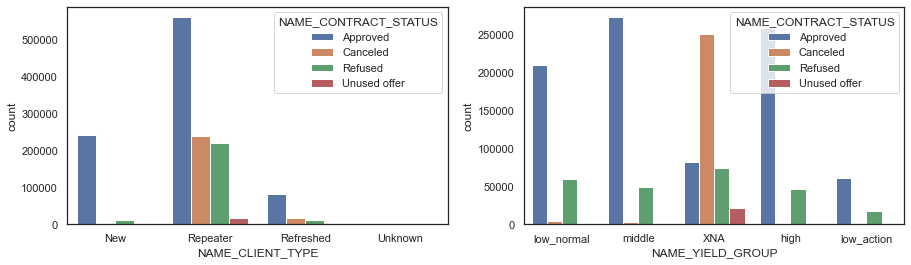

In [231]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.countplot(mergedata.NAME_CLIENT_TYPE,hue=mergedata.NAME_CONTRACT_STATUS)

plt.subplot(1,2,2)
sns.countplot(mergedata.NAME_YIELD_GROUP,hue=mergedata.NAME_CONTRACT_STATUS)

Observation:
1. The above plots indicate that the people who have repeated applied for loan, their loans have been approved and the count of such approved loans is maximum.

2. The people whose yield group is middle are the ones whose loans have been approved the most followed by the ones in high yield group. 



## Merging the current defaulter dataframe (appdata_1) with the prevdata dataframe

Merging the defaulters dataframe with the previous dataframe to understand weather the people in the pervious data are defaulters in current data or not

PLEASE NOTE: We are using the defaulters data frame which is a subset of the main application_data.csv. Soall the current ids in this merged data are of the people who are defaulters

In [232]:
mergedef=appdata_1.merge(prevdata,on='SK_ID_CURR',how='left',suffixes=('_current','_previous'))

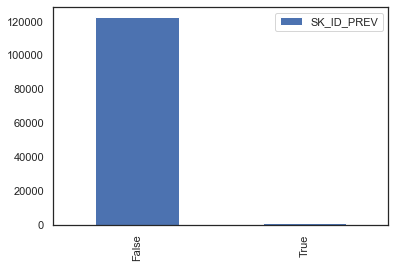

In [233]:
plt.figure(figsize=(6,4))
mergedef['SK_ID_PREV'].isnull().value_counts().plot.bar()
plt.legend()

In [234]:
mergedef.SK_ID_PREV.isnull().value_counts()

False    122360
True        980
Name: SK_ID_PREV, dtype: int64

The values above indicate that in the previous data we have 980 missing values of previous id corresponding to the defaulters data. So from previous data comparison there is an addition of 980 people in defaulters category presently.

Also there are 122360 applicants in the previous data who are still defaulters as per the current data application set. So 122360 people who were in previous application data set are still facing difficulties in making timely payments

<AxesSubplot:xlabel='NAME_CLIENT_TYPE', ylabel='count'>

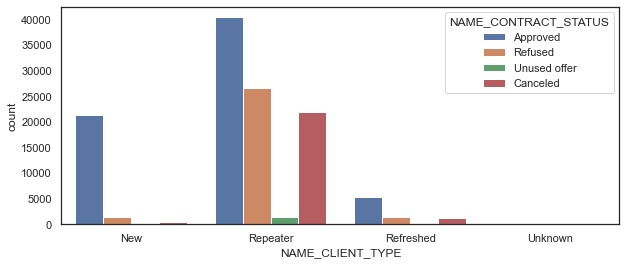

In [235]:
plt.figure(figsize=(10,4))

sns.countplot(mergedef.NAME_CLIENT_TYPE,hue=mergedef.NAME_CONTRACT_STATUS)

The observation from the above countplot is that there are more repeaters from the previous data are in the current data who have applied for loan previously and are defaulters at present.

In [236]:
import jovian
jovian.commit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[jovian] Updating notebook "avinseth/avin-seth-credit-eda-assignment" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/avinseth/avin-seth-credit-eda-assignment


'https://jovian.ai/avinseth/avin-seth-credit-eda-assignment'